In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from string import punctuation

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [3]:
df = pd.read_csv("../profiles.csv")

This project is focused on data analysis and building of machine learning algorithms for the data points provided by OKCupid Company. 

Data set contains several columns, where information about each individual OKCupid user are specified. 
Head of dataset is shown below:

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Following columns in the data set contain NaN value:

In [5]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Here are the column names shown as a Pandas object:

In [6]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [7]:
#Unique fluently spoken languages from dataset
List_Fluently = []
for i in list(df.index.values):
    for index in range(len(str(list(df.loc[i][["speaks"]])[0]).split(","))):
        item = (str(list(df.loc[i][["speaks"]])[0]).split(","))[index].strip(" ")
        if "(fluently)" in item and item not in List_Fluently:
            List_Fluently.append(item)    

In [8]:
most_learned_in_US = ['spanish', 'french', 'german', 
                      'italian', 'japanese','chinese',
                      'arabic', 'russian', 'portuguese',
                      'latin', 'korean'
                     ]

In [9]:
# ## Number of fluently and okay spoken foreign languages that are the most learned in US
List_Num_Fluently = []
List_Num_Okay = []

for i in list(df.index.values):
    fluently = 0
    okay = 0
    for index in range(len(str(list(df.loc[i][["speaks"]])[0]).split(","))):
        item = (str(list(df.loc[i][["speaks"]])[0]).split(","))[index]
        item.strip(" ")
        if "(fluently)" in item and item.split()[0] in most_learned_in_US:
            fluently += 1
        elif "(okay)" in item and item.split()[0] in most_learned_in_US:
            okay += 1
    List_Num_Fluently.append(fluently)
    List_Num_Okay.append(okay)
    
    
    
Num_Fluently_Arr = np.array(List_Num_Fluently)
df = df.join(pd.DataFrame(data = Num_Fluently_Arr).rename(columns = { 0 : 'Num_Langs_Fluently'}))
Num_Okay_Arr = np.array(List_Num_Okay)
df = df.join(pd.DataFrame(data = Num_Okay_Arr).rename(columns = { 0 : 'Num_Langs_Okay'}))

# Data Transformation to numerical data 

## State codes

In [10]:
state_list = []
for i in list(df.index.values):
    state = str(list(df.loc[i][["location"]])[0]).split(",")[-1]
    state = state.strip(" ")
    state_list.append(state)
State_Arr = np.array(state_list)
df = df.join(pd.DataFrame(data = State_Arr).rename(columns = { 0 : 'State'}))

5 the most frequent states and their OKCupid user counts:

In [11]:
df[["State"]].value_counts().head(5)

State        
california       59855
new york            17
illinois             8
massachusetts        5
oregon               4
dtype: int64

Majority of OKCupid Users are located in California. State codes are defined as follows:

    0 : California
    1 : Other in US
    2 : Other

In [12]:
states_to_code = ['california', 'new york', 'illinois', 'massachusetts', 'texas', 'michigan', 'oregon', 
                  'arizona', 'florida', 'minnesota', 'georgia', 'ohio', 'virginia', 'hawaii', 
                  'colorado', 'district of columbia', 'washington', 'utah', 
                  'north carolina', 'mexico', 'ireland', 'montana', 
                  'rhode island', 'pennsylvania', 'mississippi', 'west virginia', 
                  'louisiana', 'new jersey', 'wisconsin', 'nevada', 'connecticut', 'missouri', 
                  'tennessee', 'idaho']
state_codes = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

list_unique_states = list(df.State.value_counts().to_dict().keys())
state_code_dict = {}

for index in range(len(list_unique_states)):
    state_code_dict.setdefault(list_unique_states[index], 2)
for i in range(len(states_to_code)):
    if states_to_code[i] in state_code_dict.keys():
        state_code_dict[states_to_code[i]] = state_codes[i]
print(state_code_dict)

{'california': 0, 'new york': 1, 'illinois': 1, 'massachusetts': 1, 'michigan': 1, 'oregon': 1, 'texas': 1, 'arizona': 1, 'florida': 1, 'colorado': 1, 'district of columbia': 1, 'spain': 2, 'ohio': 1, 'minnesota': 1, 'united kingdom': 2, 'virginia': 1, 'georgia': 1, 'utah': 1, 'hawaii': 1, 'washington': 1, 'missouri': 1, 'pennsylvania': 1, 'germany': 2, 'new jersey': 1, 'montana': 1, 'north carolina': 1, 'rhode island': 1, 'wisconsin': 1, 'tennessee': 1, 'canada': 2, 'switzerland': 2, 'connecticut': 1, 'mississippi': 1, 'idaho': 1, 'west virginia': 1, 'ireland': 1, 'mexico': 1, 'nevada': 1, 'louisiana': 1, 'vietnam': 2, 'netherlands': 2}


## City codes

In [13]:
City_List = []
for i in list(df.index.values):
    city = str(list(df.loc[i][["location"]])[0]).split(",")[0]
    city = city.strip(" ")
    City_List.append(city)
City_Arr = np.array(City_List)
df = df.join(pd.DataFrame(data = City_Arr).rename(columns = { 0 : 'City'}))

5 the most frequent cities and their OKCupid user counts:

In [14]:
df[["City"]].value_counts().head(5)

City         
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
dtype: int64

Majority of OKCupid Users are located in San Francisco. City codes are defined as follows:

    san francisco : 0
    oakland : 1
    berkeley : 2
    san mateo : 3
    palo alto : 4
    other : 5

In [15]:
cities_to_code = ['san francisco', 'south san francisco', 'oakland', 'berkeley', 'san mateo', 'palo alto']
cities_codes = [0, 0, 1, 2, 3, 4]
list_unique_cities = list(df.City.value_counts().to_dict().keys())
city_code_dict = {}

for index in range(len(list_unique_cities)):
    city_code_dict.setdefault(list_unique_cities[index], 5)
for i in range(len(cities_to_code)):
    if cities_to_code[i] in city_code_dict.keys():
        city_code_dict[cities_to_code[i]] = cities_codes[i]
print(city_code_dict)

{'san francisco': 0, 'oakland': 1, 'berkeley': 2, 'san mateo': 3, 'palo alto': 4, 'alameda': 5, 'san rafael': 5, 'hayward': 5, 'emeryville': 5, 'redwood city': 5, 'daly city': 5, 'san leandro': 5, 'walnut creek': 5, 'vallejo': 5, 'menlo park': 5, 'richmond': 5, 'south san francisco': 0, 'mountain view': 5, 'novato': 5, 'burlingame': 5, 'pleasant hill': 5, 'castro valley': 5, 'stanford': 5, 'el cerrito': 5, 'pacifica': 5, 'martinez': 5, 'mill valley': 5, 'san bruno': 5, 'san pablo': 5, 'belmont': 5, 'albany': 5, 'san carlos': 5, 'benicia': 5, 'lafayette': 5, 'sausalito': 5, 'millbrae': 5, 'san anselmo': 5, 'el sobrante': 5, 'san lorenzo': 5, 'fairfax': 5, 'hercules': 5, 'pinole': 5, 'half moon bay': 5, 'fremont': 5, 'green brae': 5, 'orinda': 5, 'moraga': 5, 'larkspur': 5, 'corte madera': 5, 'belvedere tiburon': 5, 'atherton': 5, 'brisbane': 5, 'rodeo': 5, 'crockett': 5, 'el granada': 5, 'foster city': 5, 'kentfield': 5, 'woodacre': 5, 'east palo alto': 5, 'montara': 5, 'ross': 5, 'pied

## Job codes

Job codes are defined as follows:

    transportation : 0,  
    hospitality / travel : 1,   
    student' : 2, 
    artistic / musical / writer : 3,
    computer / hardware / software : 4,
    banking / financial / real estate : 5,
    entertainment / media : 6,
    sales / marketing / biz dev : 7, 
    medicine / health : 8,
    science / tech / engineering : 9, 
    executive / management : 10,
    education / academia : 11, 
    clerical / administrative : 12,
    construction / craftsmanship : 13, 
    political / government : 14,
    law / legal services : 15, 
    military : 16,
    unemployed : 17,
    retired : 18,
    rather not say : 19,
    other :20

In [16]:
job_code_dict = {
     np.nan : np.nan,
    'transportation' : 0, 
    'hospitality / travel' : 1,  
    'student' : 2,
    'artistic / musical / writer' : 3,
    'computer / hardware / software' : 4,
    'banking / financial / real estate' : 5,
    'entertainment / media' : 6,
    'sales / marketing / biz dev' : 7, 
    'medicine / health' : 8,
    'science / tech / engineering' : 9, 
    'executive / management' : 10,
    'education / academia' : 11, 
    'clerical / administrative' : 12,
    'construction / craftsmanship' : 13, 
    'political / government' : 14,
    'law / legal services' : 15, 
    'military' : 16,
    'unemployed' : 17,
    'retired' : 18,
    'rather not say' : 19,
    'other' :20
}

## Ethnicity Codes

Ethnicity codes are defined as follows:

    'White' = 0
    'Black or African American' = 1
    'Asian white' = 2
    'Asian black' = 3
    'Hispanic or latino' = 4
    'Pacific Islander'= 5
    'Other' = 6

In [17]:
ethinicity_code_dict = {
         np.nan : np.nan,
        'asian, white' : 2, 
        'white' : 0,
        'asian, black, other' : 3,
        'white, other' : 0,
        'hispanic / latin, white' : 4, 
        'hispanic / latin' : 4,
        'pacific islander, white' : 5,
        'asian' : 2,
        'black, white' : 6,
        'pacific islander' : 5,
        'asian, native american' : 2,
        'asian, pacific islander' : 5,
        'black, native american, white' : 6,
        'middle eastern, other' : 6,
        'native american, white' : 0,
        'indian' : 3,
        'black' : 1,
        'black, native american, hispanic / latin, other' : 4,
        'black, native american, hispanic / latin' : 4,
        'asian, black, pacific islander' : 5,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'other' : 6,
        'hispanic / latin, other' : 4, 
        'asian, black' : 3,
        'middle eastern, white' : 2,
        'native american, white, other' : 0,
        'black, native american' : 1,
        'black, white, other' : 6,
        'hispanic / latin, white, other' : 4, 
        'middle eastern' : 2, 
        'black, other' : 6,
        'native american, hispanic / latin, white' : 4,
        'black, indian' : 3,
        'indian, white, other' : 3,
        'middle eastern, indian, other' : 3,
        'black, native american, hispanic / latin, white, other' : 6,
        'pacific islander, hispanic / latin' : 6,
        'black, hispanic / latin, white' : 6, 
        'native american' : 0,
        'indian, white' : 3,
        'asian, white, other' : 2,
        'black, hispanic / latin' : 4,
        'asian, hispanic / latin, white' : 3,
        'middle eastern, hispanic / latin' : 3,
        'asian, black, native american, pacific islander, white' : 3,
        'middle eastern, indian' : 3,
        'asian, indian' : 3,
        'pacific islander, other' : 5,
        'black, native american, white, other' : 6,
        'black, pacific islander' : 5,
        'middle eastern, native american, white' : 0,
        'asian, native american, white, other' : 2,
        'pacific islander, hispanic / latin, white' : 5, 
        'indian, other' : 3,
        'asian, pacific islander, other' : 5,    
        'black, hispanic / latin, other' : 4,
        'asian, black, native american' : 3,
        'black, native american, hispanic / latin, white' : 6,
        'native american, hispanic / latin' : 4, 
        'indian, hispanic / latin' : 6,
        'native american, pacific islander' : 5,
        'asian, black, native american, hispanic / latin, white' : 6,
        'asian, black, white' : 6,
        'asian, black, native american, pacific islander, other' : 6,
        'middle eastern, hispanic / latin, white' : 6,
        'asian, pacific islander, white' : 5,
        'asian, native american, hispanic / latin, white, other' : 6,
        'asian, hispanic / latin' : 6,
        'asian, pacific islander, white, other' : 5,
        'middle eastern, white, other' : 2,
        'asian, pacific islander, hispanic / latin' : 6,
        'black, native american, indian, other' : 6,
        'native american, hispanic / latin, white, other' : 6,
        'black, native american, other' : 6, 
        'asian, other' : 6,
        'middle eastern, hispanic / latin, other' : 6,
        'pacific islander, hispanic / latin, white, other' : 6,
        'asian, black, hispanic / latin' : 6,
        'asian, pacific islander, hispanic / latin, white' : 6,
        'asian, black, native american, white' : 3,
        'asian, middle eastern, white, other' : 2,
        'native american, pacific islander, hispanic / latin' : 6,
        'asian, native american, white' : 2,
        'native american, pacific islander, hispanic / latin, white, other' : 6,
        'indian, pacific islander' : 3, 
        'asian, middle eastern, black' : 3,
        'asian, middle eastern, indian' : 3,
        'asian, middle eastern, white' : 2,
        'pacific islander, white, other' : 5,
        'black, pacific islander, hispanic / latin' : 5,
        'asian, middle eastern' : 2, 
        'asian, hispanic / latin, other' : 6,
        'middle eastern, black, native american, indian, white, other' : 6,
        'middle eastern, pacific islander, other' : 6,
        'middle eastern, black' : 3,
        'asian, indian, pacific islander' : 3,
        'black, native american, pacific islander' : 5,
        'native american, indian' : 3,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'black, indian, other' : 3,
        'asian, middle eastern, indian, hispanic / latin, white, other' : 6,
        'middle eastern, black, white': 3,
        'asian, hispanic / latin, white, other' : 6,
        'native american, hispanic / latin, other' : 4,
        'middle eastern, black, pacific islander, white' : 3,
        'asian, black, native american, hispanic / latin' : 6,
        'native american, other' : 0, 
        'black, indian, white' : 6,
        'asian, native american, hispanic / latin, white' : 6,
        'black, native american, indian, white' : 6,
        'middle eastern, black, indian, pacific islander, hispanic / latin, white' : 6,
        'middle eastern, hispanic / latin, white, other' : 6, 
        'asian, black, native american, other' : 3,
        'native american, pacific islander, hispanic / latin, white' : 6,
        'asian, indian, other' : 3,
        'middle eastern, native american, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander, hispanic / latin, white' : 6,
        'black, native american, pacific islander, hispanic / latin, white, other' : 6,
        'asian, middle eastern, native american, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, pacific islander, hispanic / latin, white, other': 6,
        'asian, indian, white' : 3,
        'native american, pacific islander, white, other' : 5,
        'middle eastern, black, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, other' : 2, 
        'middle eastern, pacific islander' : 3,
        'asian, black, hispanic / latin, other' : 6,
        'asian, middle eastern, black, native american, hispanic / latin, white' : 6,
        'middle eastern, black, hispanic / latin' : 6,
        'black, pacific islander, white' : 5,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, other' : 6,    
        'middle eastern, black, native american, indian, hispanic / latin, white' : 6,
        'asian, pacific islander, hispanic / latin, white, other' : 6,
        'middle eastern, indian, white' : 3, 
        'asian, indian, white, other' : 3,
        'middle eastern, black, native american, white, other' : 3,
        'black, native american, pacific islander, other' : 5,
        'middle eastern, black, native american, white' : 3,
        'asian, indian, pacific islander, other' : 3,
        'asian, black, native american, white, other' : 3,
        'black, indian, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, indian, pacific islander, white' : 3,
        'asian, black, pacific islander, hispanic / latin' : 6,
        'middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'asian, black, native american, indian' : 3,
        'asian, black, indian, hispanic / latin, other' : 6,
        'indian, hispanic / latin, other' : 6,
        'asian, indian, hispanic / latin' : 6,
        'asian, native american, pacific islander, white, other' : 5,
        'asian, black, native american, indian, hispanic / latin, white, other' : 6,
        'asian, indian, hispanic / latin, white' : 6,
        'pacific islander, hispanic / latin, other' : 6,
        'asian, indian, pacific islander, hispanic / latin, white, other' : 6,
        'indian, hispanic / latin, white' : 6,
        'asian, native american, pacific islander, hispanic / latin, white, other' : 6,
        'asian, pacific islander, hispanic / latin, other' : 6,
        'asian, black, hispanic / latin, white, other' : 6,
        'black, indian, hispanic / latin' : 6,
        'middle eastern, black, native american, hispanic / latin, white' : 6,
        'black, pacific islander, other' : 5,
        'black, native american, pacific islander, white' : 5,
        'asian, black, native american, pacific islander' : 3,
        'asian, indian, hispanic / latin, other' : 6,
        'middle eastern, native american' : 0,
        'middle eastern, native american, hispanic / latin' : 6,
        'black, hispanic / latin, white, other' : 4,
        'asian, native american, pacific islander, hispanic / latin, white' : 6,
        'asian, native american, hispanic / latin' : 6,
        'black, native american, indian, hispanic / latin, white, other' : 6,
        'asian, middle eastern, hispanic / latin, white' : 6,
        'black, native american, pacific islander, white, other' : 5,
        'native american, indian, pacific islander, hispanic / latin' : 6,
        'black, indian, white, other' : 6,
        'asian, middle eastern, native american, pacific islander, hispanic / latin, white, other' : 6,
        'native american, pacific islander, white' : 5,
        'middle eastern, indian, white, other' : 3,
        'asian, black, white, other' : 6,
        'middle eastern, native american, hispanic / latin, white' : 6,
        'indian, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander' : 3,
        'asian, middle eastern, black, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, indian, other' : 3,
        'asian, middle eastern, black, white, other' : 3,
        'black, native american, pacific islander, hispanic / latin, white' : 6,
        'black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, black, pacific islander, white' : 5,
        'middle eastern, pacific islander, hispanic / latin' : 6,
        'black, native american, indian, white, other' : 6,
        'asian, black, hispanic / latin, white' : 6,
        'asian, black, native american, indian, pacific islander, white' : 3,
        'asian, black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, middle eastern, hispanic / latin, white, other' : 6,
        'middle eastern, black, native american, indian' : 3,
        'asian, native american, pacific islander' : 5,
        'asian, black, native american, pacific islander, white, other' : 6,
        'asian, middle eastern, hispanic / latin' : 6,
        'asian, black, pacific islander, other' : 5,
        'asian, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'middle eastern, native american, white, other' : 2,
        'asian, native american, hispanic / latin, other' :6,
        'native american, indian, white' : 3,
        'black, native american, pacific islander, hispanic / latin' : 6,
        'asian, native american, pacific islander, white' : 5,
        'black, native american, indian' : 3,
        'indian, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin' : 6,
        'asian, middle eastern, indian, hispanic / latin' : 6,
        'asian, middle eastern, native american, pacific islander, other' : 5,
        'black, native american, indian, pacific islander' : 3,
        'asian, middle eastern, native american, pacific islander, white, other' : 5,
        'asian, native american, other' : 2, 
        'middle eastern, black, other' : 3,
        'asian, black, pacific islander, hispanic / latin, white' : 6,
        'asian, middle eastern, native american, indian, pacific islander, hispanic / latin, white' : 6,
        'asian, native american, indian, pacific islander, hispanic / latin, white, other' : 6,
        'asian, middle eastern, black, pacific islander, hispanic / latin' : 6,
        'asian, black, pacific islander, white, other' : 5,
        'asian, black, indian' : 3
    }

## Diet codes

Diet codes are defined as follows:

        'anything' : 0,
        'mostly anything' : 1,
        'strictly anything' : 2,
        'other' : 3,
        'mostly other' : 4,
        'strictly other' : 5,
        'vegetarian' : 6,
        'mostly vegetarian' : 7,
        'strictly vegetarian' : 8,
        'vegan' : 9,
        'mostly vegan' : 10, 
        'strictly vegan' :11,
        'halal' : 12,
        'mostly halal' : 13,
        'strictly halal' : 14,
        'kosher' : 15,
        'mostly kosher' : 16,
        'strictly kosher' : 17

In [19]:
diet_code_dict = {
         np.nan : np.nan,
        'anything' : 0,
        'mostly anything' : 1,
        'strictly anything' : 2,
        'other' : 3,
        'mostly other' : 4,
        'strictly other' : 5,
        'vegetarian' : 6,
        'mostly vegetarian' : 7,
        'strictly vegetarian' : 8,
        'vegan' : 9,
        'mostly vegan' : 10, 
        'strictly vegan' :11,
        'halal' : 12,
        'mostly halal' : 13,
        'strictly halal' : 14,
        'kosher' : 15,
        'mostly kosher' : 16,
        'strictly kosher' : 17
    }

## Orientation

Sexual orientation codes are defined as follows

    'straight' : 0,
    'gay' : 1,
    'bisexual' : 2

In [20]:
orient_code_dict = {
    'straight' : 0,
    'gay' : 1,
    'bisexual' : 2
                }

## Drugs codes:
    'never' : 0, 
    'sometimes' : 1, 
    'often' :2

In [21]:
drugs_code_dict = {
    np.nan : np.nan,
    'never' : 0, 
    'sometimes' : 1, 
    'often' : 2    
}

## Drinks codes:

    'not at all' : 0
    'rarely' : 1
    'socially' : 2 
    'often' : 3
    'very often' : 4
    'desperately' : 5

In [22]:
drinks_code_dict = {
    np.nan : np.nan,
    'not at all' : 0,
    'rarely' : 1,
    'socially' : 2, 
    'often' : 3,
    'very often' : 4,
    'desperately' : 5
}

 ## Smokes codes:
    'sometimes' : 2
    'no' : 0
    'when drinking': 1
    'yes' : 4
    'trying to quit' : 3

In [23]:
smokes_code_dict = {
    np.nan : np.nan,
    'no' : 0,
    'when drinking': 1,
    'sometimes' : 2,
    'trying to quit' : 3,
    'yes' : 4    
}

## Education codes:

    elementary: 1
    secondary: 2
    post-secondary: 3
    PhD: 4

In [24]:
education_code_dict = {
     np.nan : np.nan,
     'working on college/university' : 2,
     'working on space camp' : 1,
     'graduated from masters program' : 3,
     'graduated from college/university' : 3,
     'working on two-year college' : 2,
     'graduated from high school' : 2,
     'working on masters program' : 2,
     'graduated from space camp' : 2,
     'college/university' : 3,
     'dropped out of space camp' : 1,
     'graduated from ph.d program' : 4,
     'graduated from law school' : 3,
     'working on ph.d program' : 3,
     'two-year college' : 3,
     'graduated from two-year college' : 3,
     'working on med school' : 2,
     'dropped out of college/university' : 2,
     'space camp' : 2,
     'graduated from med school' : 3,
     'dropped out of high school' : 1,
     'working on high school' : 1,
     'masters program' : 3,
     'dropped out of ph.d program' : 3,
     'dropped out of two-year college' : 2,
     'dropped out of med school' : 2,
     'high school' : 2,
     'working on law school' : 2,
     'law school' : 3,
     'dropped out of masters program' : 2,
     'ph.d program' : 4,
     'dropped out of law school' : 2,
     'med school' : 3
    }

## Sex Codes

In [25]:
sex_code_dict = {'m': 0, 'f': 1}

Sex codes are defined as follows:
    
      male : 0
      female: 1

## Income Codes

In [26]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

Four income categories are defined:

    category 0 : income not specified, valued equal to -1
    category 1 : income 0 - 50 000 USD
    category 2 : income 50 000 - 100 000 USD
    category 3 : income more than 100 000 USD

In [27]:
income_code_dict = {
       -1 : 0,
    20000 : 1,
    30000 : 1,
    40000 : 1,
    50000 : 1,
    60000 : 2,
    70000 : 2,
    80000 : 2,
   100000 : 2,
   150000 : 3,
   250000 : 3,
   500000 : 3,
  1000000 : 3
}

## Status code

In [28]:
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

## Body Type

Body type codes are as follows:

     'average'           : 6,
     'fit'               : 3,
     'athletic'          : 4,
     'thin'              : 1,
     'curvy'             : 8,
     'a little extra'    : 0,
     'skinny'            : 2,
     'full figured'      : 9,
     'overweight'        : 10,
     'jacked'            : 5,
     'used up'           : 7,
     'rather not say'    : 11

In [29]:
body_code_dict = {
     np.nan : np.nan,
     'average'           : 6,
     'fit'               : 3,
     'athletic'          : 4,
     'thin'              : 1,
     'curvy'             : 8,
     'a little extra'    : 0,
     'skinny'            : 2,
     'full figured'      : 9,
     'overweight'        : 10,
     'jacked'            : 5,
     'used up'           : 7,
     'rather not say'    : 11
    }

## Relationship to pets

Relationship to pets 

    0 : like both cats and dogs
    1 : like dogs
    2 : like cats
    3 : dislike both cats and dogs

In [90]:
pets_code_dict = {
    np.nan : np.nan,
    'likes dogs and likes cats' : 0,
    'likes dogs' : 1,                         
    'likes dogs and has cats' : 0,            
    'has dogs' : 1,                           
    'has dogs and likes cats' : 0,            
    'likes dogs and dislikes cats' : 1,       
    'has dogs and has cats' : 0,               
    'has cats' : 2,                          
    'likes cats' : 2,                         
    'has dogs and dislikes cats' : 1,         
    'dislikes dogs and likes cats' : 2,   
    'dislikes dogs and dislikes cats' : 3,    
    'dislikes cats' : 1,
    'dislikes dogs and has cats' : 2,         
    'dislikes dogs' : 2                      
}

## Offspring

Offspring codes are as follows:

    doesn´t have a kids : 0,
    doesn´t have kids and don´t want them : 1,
    doens´t have a kids a want them : 2,
    have kids : 3
    have kids and do not want more : 4,
    have kids/have kids and want more : 5,

In [31]:
offspring_code_dict = {
    np.nan : np.nan,
    'doesn&rsquo;t have kids' :  0,                       
    'doesn&rsquo;t have kids, but might want them'  : 2,     
    'doesn&rsquo;t have kids, but wants them' : 2,               
    'doesn&rsquo;t want kids' : 1,                              
    'has kids' : 3,                                            
    'has a kid' : 3,                                            
    'doesn&rsquo;t have kids, and doesn&rsquo;t want any' : 1, 
    'has kids, but doesn&rsquo;t want more' : 4,                
    'has a kid, but doesn&rsquo;t want more' : 4,               
    'has a kid, and might want more'   : 5,                    
    'wants kids' : 2,                                           
    'might want kids' : 2,                                        
    'has kids, and might want more' : 5,                        
    'has a kid, and wants more' : 5,                            
    'has kids, and wants more' : 5
    }

In [32]:
cols_to_clear = ["religion", "sign"]
          
def clear_columns(dataframe, cols_list: list):
    for col in cols_list:
        new_column = str(col)+"_clear"
        dataframe[new_column] = dataframe.apply(lambda row: str(row[col]).split()[0], axis = 1)
    return dataframe

In [33]:
# Calling function to clear zodiac sign and religion column. 
#
clear_columns(df, cols_to_clear)
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,sign,smokes,speaks,status,Num_Langs_Fluently,Num_Langs_Okay,State,City,religion_clear,sign_clear
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,gemini,sometimes,english,single,0,0,california,south san francisco,agnosticism,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,cancer,no,"english (fluently), spanish (poorly), french (...",single,0,0,california,oakland,agnosticism,cancer
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,0,0,california,san francisco,nan,pisces


## Religion codes

Religion codes are as follows:

    'agnosticism' : 2,
    'other' : 1,
    'atheism' : 0, 
    'christianity' : 3,
    'catholicism' : 4,
    'judaism' : 5,
    'buddhism' : 6,
    'hinduism' : 7,
    'islam' : 8 

In [34]:
religion_code_dict = {
    'nan' : np.nan,
    np.nan : np.nan,
    'agnosticism' : 2,
    'other' : 1,
    'atheism' : 0, 
    'christianity' : 3,
    'catholicism' : 4,
    'judaism' : 5,
    'buddhism' : 6,
    'hinduism' : 7,
    'islam' : 8    
}

In [35]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

def clean_words(word_list: list):
    clean_word_list = [word.strip(punctuation) for word in word_list if word.strip(punctuation)]
    return clean_word_list
#
# Removing the NaNs. 
#
essays_only = df[essay_cols].replace(np.nan, '', regex=True)
#
# Removing break sign from text string. 
#
all_essays = (pd.DataFrame(essays_only.apply(lambda row: ' '.join(row).replace("<br",""), axis = 1))
              .rename(columns = {0:'essays_combined'})
             )
#
df = df.join(all_essays)
#
# Creating new columns
df['I_me_Freq'] = df.apply(lambda row: row['essays_combined'].count("I") + row['essays_combined'].count("me"), axis = 1)
df["num_words"] = df.apply(lambda row: len(clean_words(row['essays_combined'].split())), axis = 1)
df["essay_length_clean"] = df.apply(lambda row: len(" ".join(clean_words(row['essays_combined'].split()))), axis = 1)
df["essay_length_wo_spaces"] = df.apply(lambda row: len("".join(clean_words(row['essays_combined'].split()))), axis = 1)

In [94]:
## Transformation into numerical data
cols_to_code = ["income", "diet", "drugs", "drinks", "smokes", "orientation", 
                "education", "ethnicity", "job", "sex", "State", "City",
               "body_type", "pets", "religion_clear", "offspring"]
code_dicts = (income_code_dict, diet_code_dict, drugs_code_dict, drinks_code_dict, 
              smokes_code_dict, orient_code_dict, education_code_dict, ethinicity_code_dict,
              job_code_dict, sex_code_dict, state_code_dict, city_code_dict, body_code_dict, 
              pets_code_dict, religion_code_dict, offspring_code_dict
             )            

def code_columns(dataframe, cols_to_code_lst: list, code_dicts_tpl: tuple):
    for index, col in enumerate(cols_to_code_lst):
        new_column = str(col)+"_code"
        dataframe[new_column] = df.apply(lambda row: code_dicts_tpl[index][row[col]], axis = 1)
    return dataframe

In [95]:
code_columns(df, cols_to_code, code_dicts)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,education_code,ethnicity_code,job_code,sex_code,State_code,City_code,body_type_code,pets_code,religion_clear_code,offspring_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\r\n<br />\r\ni would love to t...,currently working as an international agent fo...,making people laugh.<br />\r\nranting about a ...,"the way i look. i am a six foot half asian, ha...",...,2.0,2.0,0.0,0,0,0,0.0,0.0,2.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\r\...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,1.0,0.0,1.0,0,0,1,6.0,0.0,2.0,2.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,3.0,NaN,NaN,0,0,0,1.0,2.0,NaN,NaN
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,2.0,0.0,2.0,0,0,2,1.0,2.0,NaN,1.0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\r\nhttp://b...,i smile a lot and my inquisitive nature,...,3.0,3.0,3.0,0,0,0,4.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,3.0,NaN,7.0,1,0,1,NaN,1.0,4.0,3.0
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\r\ni never know what to write ...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,2.0,0.0,6.0,0,0,0,3.0,0.0,2.0,0.0
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\r\n- get...,i'm quiet until i get used to the environment ...,...,3.0,2.0,13.0,0,0,0,6.0,NaN,3.0,0.0
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\r\n""you got a dre...",listening,it used to be the hair until i mowed it off bu...,...,2.0,3.0,8.0,0,0,0,4.0,0.0,2.0,2.0


# Analysis of Foreign Languages

The most learned languages in US are: 
https://www.infoplease.com/us/society-culture/most-studied-foreign-languages-us

In [40]:
print(*most_learned_in_US, sep="  |  ")

spanish  |  french  |  german  |  italian  |  japanese  |  chinese  |  arabic  |  russian  |  portuguese  |  latin  |  korean


The graphs below are showing the number of OKCupid Users devided into categories based on the number of fluently and okay speaking languages. Only the most in US learned foreign languages are considered.  

It clearly shows that majority of users speaks only english without knowledge of any foreign language.

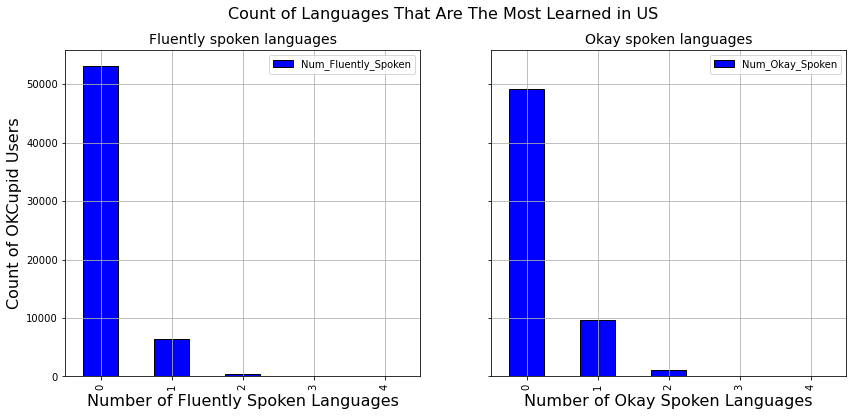

In [46]:
fig, axes = plt.subplots(1,2, figsize=(14,6), sharey = True, squeeze = True)
(ax1, ax2) = axes
plt.suptitle("Count of Languages That Are The Most Learned in US", fontsize = 16)
df.assign(Num_Fluently_Spoken = 1).groupby("Num_Langs_Fluently").count()[["Num_Fluently_Spoken"]].plot.bar(ax=ax1, edgecolor = 'black',  color = 'blue')
df.assign(Num_Okay_Spoken = 1).groupby("Num_Langs_Okay").count()[["Num_Okay_Spoken"]].plot.bar(ax=ax2, edgecolor = 'black',  color = 'blue')
ax1.set_xlabel('Number of Fluently Spoken Languages', fontsize = 16);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 16);
ax1.set_title("Fluently spoken languages", fontsize = 14)
ax1.grid();

ax2.set_xlabel('Number of Okay Spoken Languages', fontsize = 16);
ax2.set_ylabel('Frequency in Dataset', fontsize = 16);
ax2.set_title("Okay spoken languages", fontsize = 14)
ax2.grid();

# Age Distribution and Education Level Counts 

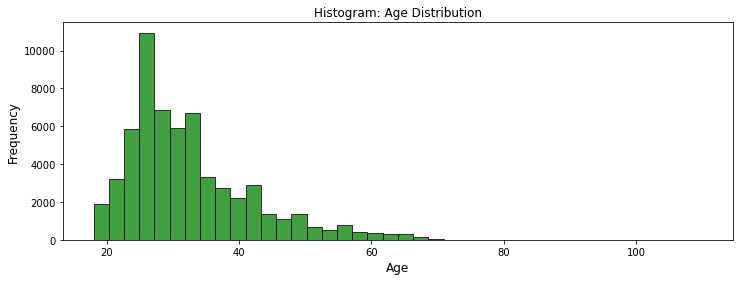

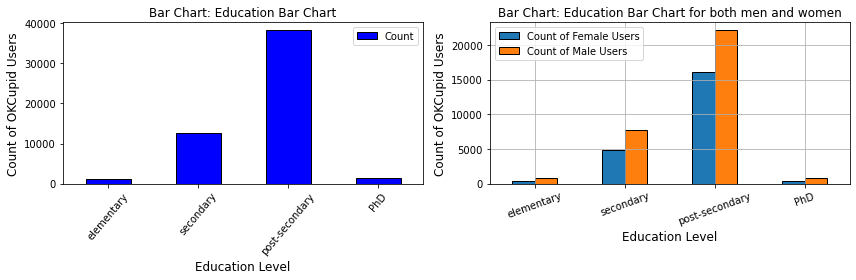

In [256]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes

education_labels = ['elementary', 'secondary', 'post-secondary', 'PhD']

df['age'].plot.hist(bins = 40, ax=ax1, edgecolor = 'black', color = 'green', alpha = 0.75);
ax1.set_xlabel('Age', fontsize = 12);
ax1.set_ylabel('Frequency', fontsize = 12);
ax1.set_title('Histogram: Age Distribution', fontsize = 12);

fig, axes = plt.subplots(1,2, figsize=(12,4))
(ax1, ax2) = axes

df.assign(count = 1).groupby("education_code").count()[["count"]].plot.bar(ax=ax1, edgecolor = 'black',  color = 'blue')
ax1.set_xlabel('Education Level', fontsize = 12);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 12);
ax1.set_title('Bar Chart: Education Bar Chart', fontsize = 12);
legend_label_education = ['Count']
ax1.legend(labels= legend_label_education)
ax1.set_xticklabels(education_labels, rotation = 50);

df.assign(count = 1).groupby(["education_code", "sex"]).count()[["count"]].unstack(1).plot.bar(ax = ax2, edgecolor = 'black')
ax2.set_xlabel('Education Level', fontsize = 12);
ax2.set_ylabel('Count of OKCupid Users', fontsize = 12);
ax2.set_title('Bar Chart: Education Bar Chart for both men and women', fontsize = 12);
ax2.set_xticklabels(education_labels, rotation = 20);
legend_label_education_grouped = ['Count of Female Users', 'Count of Male Users']
ax2.legend(labels= legend_label_education_grouped)
ax2.grid();

plt.tight_layout();

Majority of OKCupid Users are around 30 years old. 

Considering the Education level bar chart most of them also finished their post-secondary studies. 

Number of PhD graduates is very low in comparison with post-secondary and secondary education category. 

# Sexual orientation and Gender

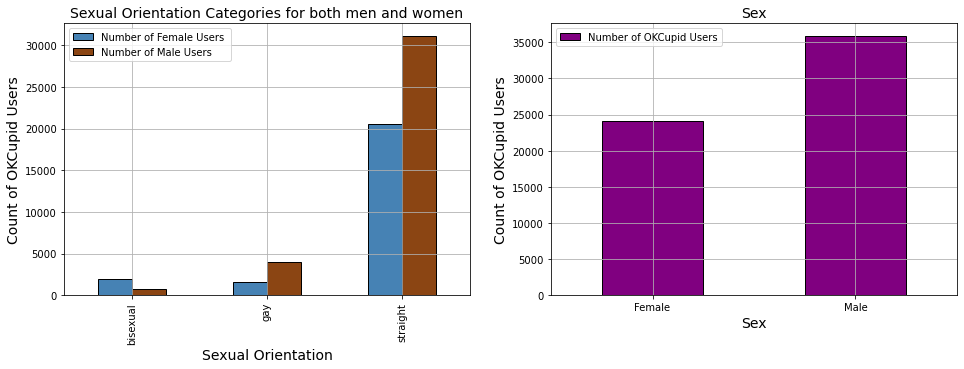

In [47]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
(ax1, ax2) = axes
legend_labels = ['Number of Female Users ', 'Number of Male Users']
bar_color = ['steelblue', 'saddlebrown']
df.assign(count = 1).groupby(["orientation", "sex"]).count()[["count"]].unstack(1).plot.bar(ax = ax1, color = bar_color, edgecolor = 'black')
ax1.set_xlabel('Sexual Orientation', fontsize = 14);
ax1.set_ylabel('Count of OKCupid Users', fontsize = 14);
ax1.set_title('Sexual Orientation Categories for both men and women', fontsize = 14);
ax1.legend(labels = legend_labels)
ax1.grid();


(df[["sex"]].assign(count = 1).groupby("sex").sum()
.plot.bar(ax = ax2, color = "purple", edgecolor = 'black')
)
ax2.set_xlabel('Sex', fontsize = 14);
ax2.set_ylabel('Count of OKCupid Users', fontsize = 14);
ax2.set_title('Sex', fontsize = 14);
ax2.legend(labels = ['Number of OKCupid Users'])
ax2.set_xticklabels(labels = ['Female', 'Male'], rotation = 0)
ax2.grid();

In [48]:
number_of_male_profiles = df.sex.value_counts()[0]
number_of_female_profiles = df.sex.value_counts()[1]
sum_of_profiles = df.shape[0]

print('Data set OKCupid contains {} male and {} female profiles.'.format(number_of_male_profiles, number_of_female_profiles))
print("\n")
(print('Percentage values are: {} % male and {} % female profiles.'
      .format(round(number_of_male_profiles/sum_of_profiles * 100, 1), 
              round(number_of_female_profiles/sum_of_profiles * 100, 1)))
)

Data set OKCupid contains 35829 male and 24117 female profiles.


Percentage values are: 59.8 % male and 40.2 % female profiles.


Bisexual orientation is more common for female sex.

Gay orientation is more common for male sex.

Number of male profiles is higher by 11712. 

# Religion

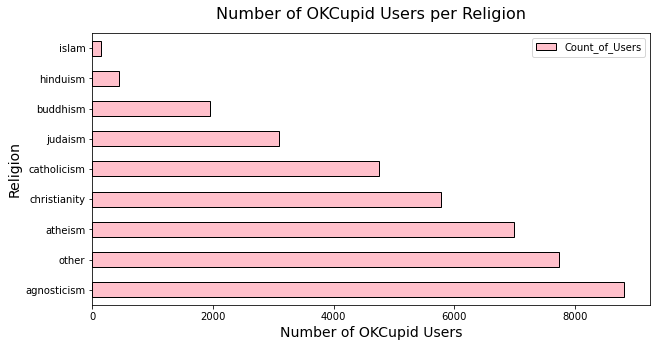

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

(df[["religion_clear"]].drop(df.query("religion_clear == 'nan'").index, axis = 0)
 .assign(Count_of_Users = 1)
 .groupby("religion_clear")
 .sum()
 .sort_values(by='Count_of_Users', ascending=False)
).plot.barh(ax = ax, edgecolor = 'black', color = 'pink');
ax.set_title('Number of OKCupid Users per Religion', fontsize=16, y= 1.03)
ax.set_xlabel('Number of OKCupid Users', fontsize=14)
ax.set_ylabel('Religion', fontsize=14);

Islam and hinduism are minor religions in the data set. The most common religions in the dataset are agnosticism, atheism and other spiritual approaches. 

# Sexual Orientation and Religion

Relationship between sexual orientation and religion feature are visualized by the scatter plot. 

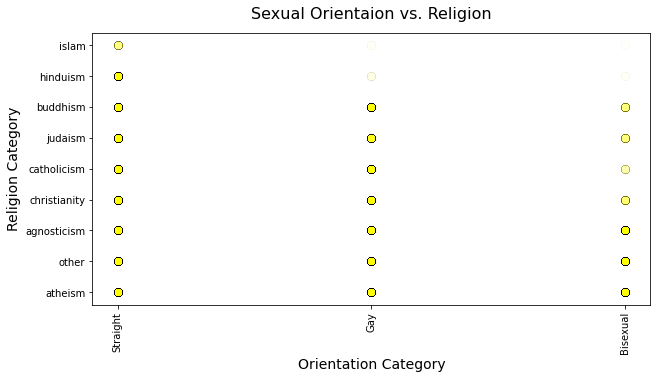

In [50]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
(ax1) = axes

(df[["religion_clear_code", "orientation_code"]].dropna()
 .plot.scatter('orientation_code', 'religion_clear_code', ax = ax1, marker = 'o', s=80, color = 'yellow', edgecolor = 'black', alpha= 0.002)
);

x_ticks_orientation = [0, 1, 2]
y_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]

religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
orientation_labels = ["Straight", "Gay", "Bisexual"]

ax1.set_xticks(x_ticks_orientation)
ax1.set_xticklabels(labels = orientation_labels, rotation = 90)
ax1.set_yticks(y_ticks_religion)
ax1.set_yticklabels(labels = religion_labels)
ax1.set_title('Sexual Orientaion vs. Religion', fontsize=16, y= 1.03)
ax1.set_xlabel('Orientation Category', fontsize=14)
ax1.set_ylabel('Religion Category', fontsize=14);

Scatter plot shows lower number of OKCupid users with bisexual orientation in Catolicism, Judaism and Budhism religion group. 
The total number of islamic and hinduistic users is generally low and therefore also the scatter plot shows very bright spots for Gay and Bisexual Category for those two religions.

Bisexual people are mostly linked to atheism, other or agnosticism religion.

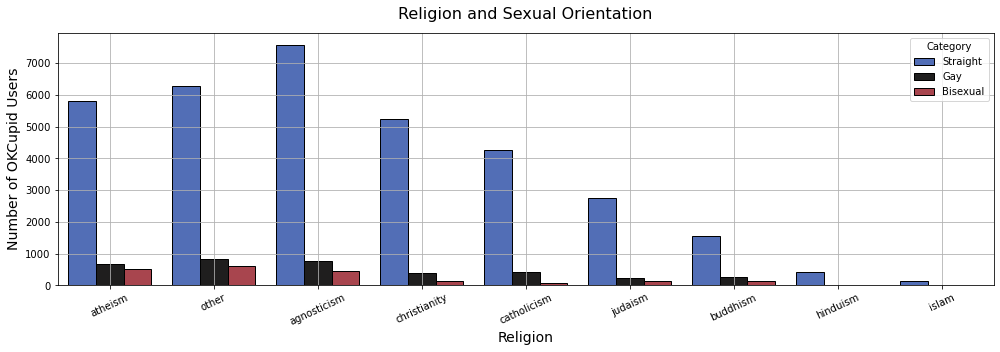

In [51]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
ax1 = axes
axs = [ax1] 
    
titles = ['Religion and Sexual Orientation']

x_ticks_religion_labels = [['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']]

xlabels = ['Religion']
ylabels = 'Number of OKCupid Users'
columns = ["religion_clear_code"]

for i, ax in enumerate(axs):
    df_a = df.query("orientation_code == 0").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Straight")
    df_b = df.query("orientation_code == 1").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Gay")
    df_c = df.query("orientation_code == 2").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Bisexual")
    df_plot = pd.concat([df_a, df_b, df_c], axis = 0)
    sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax, edgecolor = 'black', palette="icefire");
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_religion_labels[i], rotation = 25)
    ax.grid()
    plt.tight_layout();

The major sexual orientation for every religion is "straight" one. Christianity and Catholicism generally shows low number of bisexual population. 

Atheism, Other and Agnosticism are the most frequently mentioned religions in the data set. 

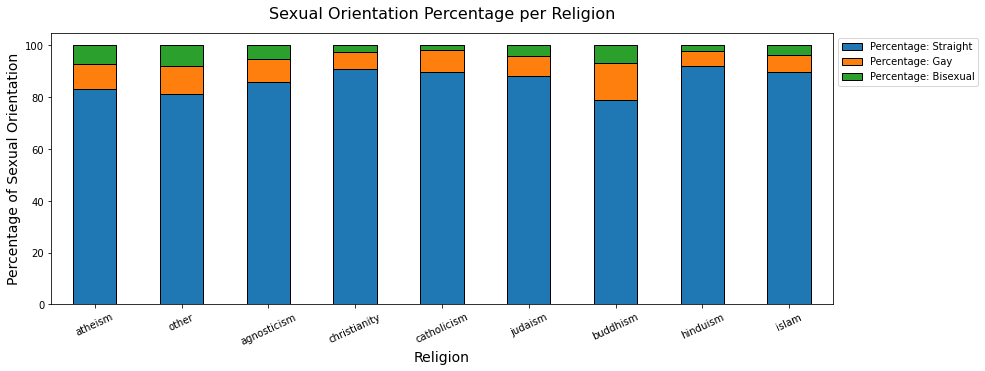

In [52]:
df_rel_perct= (df[['religion_clear_code', 'orientation_code']]
.assign(count = 1)
.groupby(["religion_clear_code", "orientation_code"]).sum()
.groupby("religion_clear_code").transform(lambda x: np.round(x/sum(x)*100,2))
.unstack(1)
)

fig, axes = plt.subplots(1,1, figsize=(14,5))
ax1 = axes

df_rel_perct.plot.bar(stacked=True, ax = ax1, edgecolor = 'black')
x_ticks_religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']

ax1.set_title('Sexual Orientation Percentage per Religion', fontsize=16, y= 1.03)
ax1.set_xlabel('Religion', fontsize=14)
ax1.set_ylabel('Percentage of Sexual Orientation', fontsize=14);
ax1.set_xticklabels(labels = x_ticks_religion_labels, rotation = 25);
ax1.legend(labels = ['Percentage: Straight', 'Percentage: Gay', 'Percentage: Bisexual'], bbox_to_anchor=(1,1));


Highest percentage of the gay population can be identified for the buddhism religion. 

Islam, Catholicism, Christianity and Hinduism have the highest percentage of heterosexuals. 

# Smokes, Drugs, Drinks Use and Sexual Orientation

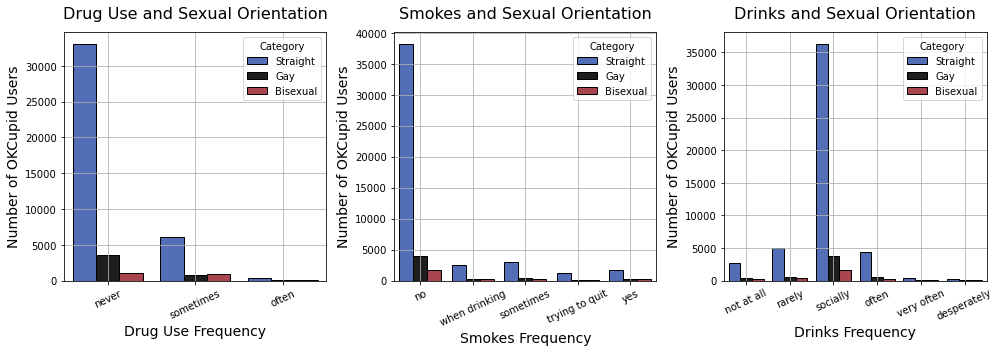

In [53]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
(ax1, ax2, ax3) = axes
axs = [ax1, ax2, ax3] 
    
titles = ['Drug Use and Sexual Orientation', 
          'Smokes and Sexual Orientation', 
          'Drinks and Sexual Orientation'
         ]

xlabels = ['Drug Use Frequency', 'Smokes Frequency', 'Drinks Frequency']
ylabels = 'Number of OKCupid Users'
x_ticks_labels = [["never", "sometimes", "often"], 
                  ['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'],
                  ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
                 ]

columns = ["drugs_code", "smokes_code", "drinks_code"]

for i, ax in enumerate(axs):
    df_a = df.query("orientation_code == 0").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Straight")
    df_b = df.query("orientation_code == 1").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Gay")
    df_c = df.query("orientation_code == 2").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Bisexual")
    df_plot = pd.concat([df_a, df_b, df_c], axis = 0)
    sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax, edgecolor = 'black', palette="icefire");
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_labels[i], rotation = 25)
    ax.grid()
    plt.tight_layout();

Most of OKCupid users never use drugs and do not smoke at all. 
Majority of OKCUpid users drink alcoholic beverages socially. 

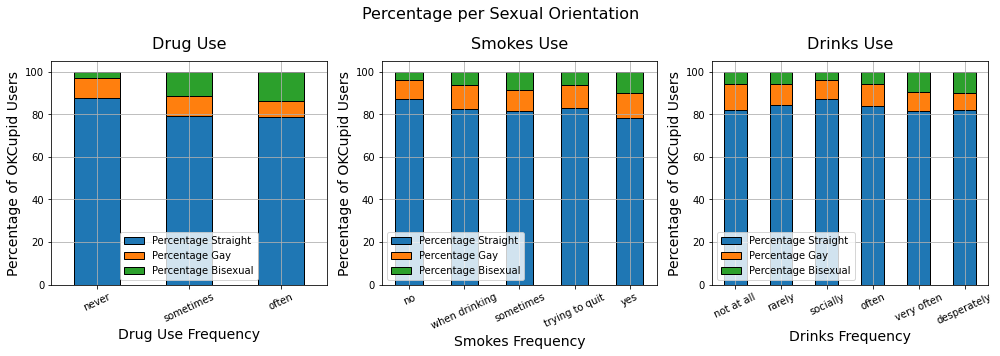

In [54]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
(ax1, ax2, ax3) = axes
axs = [ax1, ax2, ax3] 
plt.suptitle("Percentage per Sexual Orientation", fontsize = 16)
    
titles = ['Drug Use', 
          'Smokes Use', 
          'Drinks Use'
         ]

xlabels = ['Drug Use Frequency', 'Smokes Frequency', 'Drinks Frequency']
ylabels = 'Percentage of OKCupid Users'
x_ticks_labels = [["never", "sometimes", "often"], 
                  ['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'],
                  ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
                 ]

columns = ["drugs_code", "smokes_code", "drinks_code"]

for i, ax in enumerate(axs):
    df_perct= (df[[columns[i], 'orientation_code']]
    .assign(count = 1)
    .groupby([columns[i], "orientation_code"]).sum()
    .groupby([columns[i]]).transform(lambda x: np.round(x/sum(x)*100,2))
    .unstack(1)
    )
    df_perct.plot.bar(stacked=True, ax = ax, edgecolor = 'black')
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_labels[i], rotation = 25)
    ax.grid()
    ax.legend(labels =  ['Percentage Straight', 'Percentage Gay', 'Percentage Bisexual'])
    plt.tight_layout();

Bisexual population from the data set is more likely to use drugs. Amount of bisexual people that never use drugs is much lower. 

Percentage of gay population from dataset is almost equal for every category of smoking. 

Bisexual people have the largest percentage value in "very often" and "desperately" category of drinks. 

Gay percentage for all drugs, smokes and drinks category is almost similar. 


# Ethnicity percentage in the dataset

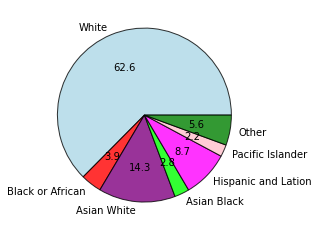

In [55]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes
ethnicities = df[["ethnicity_code"]].dropna().assign(count = 1).groupby("ethnicity_code").count().values.flatten()
labels = ['White', 'Black or African', 'Asian White', 'Asian Black', 'Hispanic and Lation', 'Pacific Islander', 'Other']
colors = ['lightblue', 'red', 'purple', 'lime', 'magenta', 'pink', 'green']
ax1.pie(ethnicities, labels = labels, colors=colors, autopct='%.1f', wedgeprops={'edgecolor': 'black', 'alpha': 0.8});

# States and their percentage in the dataset

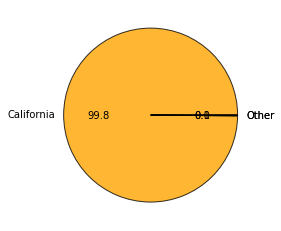

In [56]:
states = df[["State_code"]].assign(count = 1).groupby("State_code").count().values.flatten()
labels_states = ['California', 'Other', 'Other']
colors_states = ['orange', 'cyan', 'yellow']
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes

ax1.pie(states, labels = labels_states, colors=colors_states, autopct='%.1f', wedgeprops={'edgecolor': 'black', 'alpha': 0.8});

99,8% of OKCupid Users are located in California. 

# Income distribution in state California

Majority is OKCupid users come from State California and therefore the income distribution is plotted only based on data point of all californian people in the data set. 

The value in the "income" column with the highest occurence is -1. Those entries have been dropped before histogram plot. 

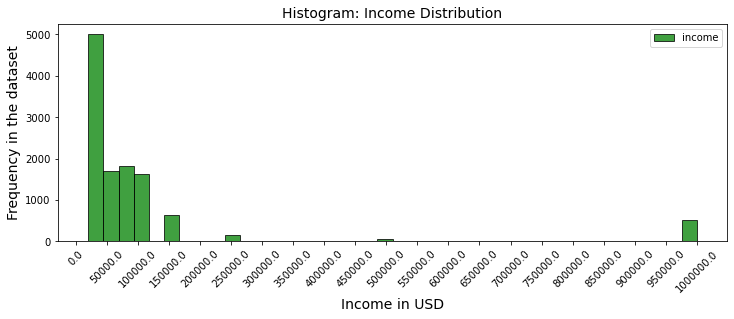

In [181]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
(ax1) = axes
x_ticks_income = np.linspace(0,1000000,21)
(df.drop(df.query("State_code != 0" and "income < 0").index, axis = 0)[["income"]]
.plot.hist(bins = 40, ax=ax1, edgecolor = 'black', color = 'green', alpha = 0.75)
)

ax1.set_xlabel('Income in USD', fontsize = 14);
ax1.set_ylabel('Frequency in the dataset', fontsize = 14);
ax1.set_title('Histogram: Income Distribution', fontsize = 14)
ax1.set_xticks(x_ticks_income)
ax1.set_xticklabels(x_ticks_income, rotation = 45);

Before the histogram plot the dataframe rows with unspecificied income value (equal to -1) have been dropped. 

The most common income values are below 50 000 USD, the income category nr. 1 is the most typical for users that have specified their income. 

# Job Categories in state California

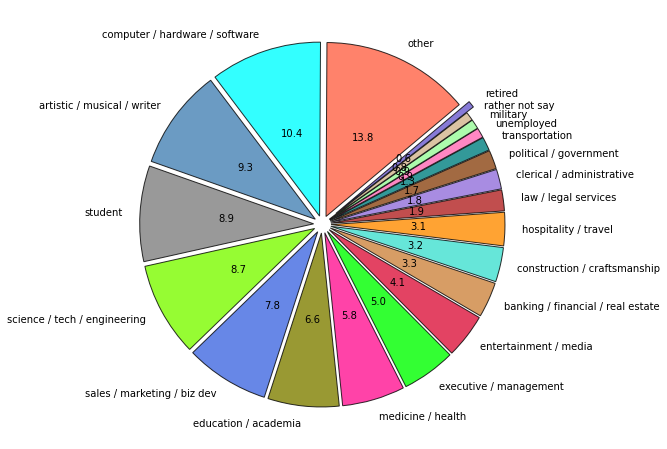

In [47]:
job_pie_df = (df.drop(df.query("State_code != 0" and "income < 0").index, axis = 0).assign(count = 1).groupby("job").count()[["count"]]
    .sort_values("count", ascending = False)
                )
data_job_pie = job_pie_df.values.flatten()
labels_job_pie = np.array(list(job_pie_df.index))
color_job_pie = ['tomato', 'aqua', 'steelblue', 'gray', 'lawngreen', 'royalblue', 'olive', 
                 'deeppink', 'lime', 'crimson', 'peru', 'turquoise', 'darkorange', 'firebrick',
                'mediumpurple', 'saddlebrown', 'teal', 'hotpink', 'palegreen', 'tan', 'slateblue'
                ]
fig, axes = plt.subplots(1,1, figsize=(8,8))
(ax1) = axes

ax1.pie(data_job_pie, labels = labels_job_pie, colors=color_job_pie, 
        explode=np.concatenate([np.repeat(0.05, len(data_job_pie)-1), np.array([0.1])]),
        autopct='%.1f', 
        pctdistance=0.5, 
        wedgeprops={'edgecolor': 'black', 'alpha': 0.8}, 
        textprops={'fontsize':10.0},
        startangle=40
        );

# Offspring and Gender

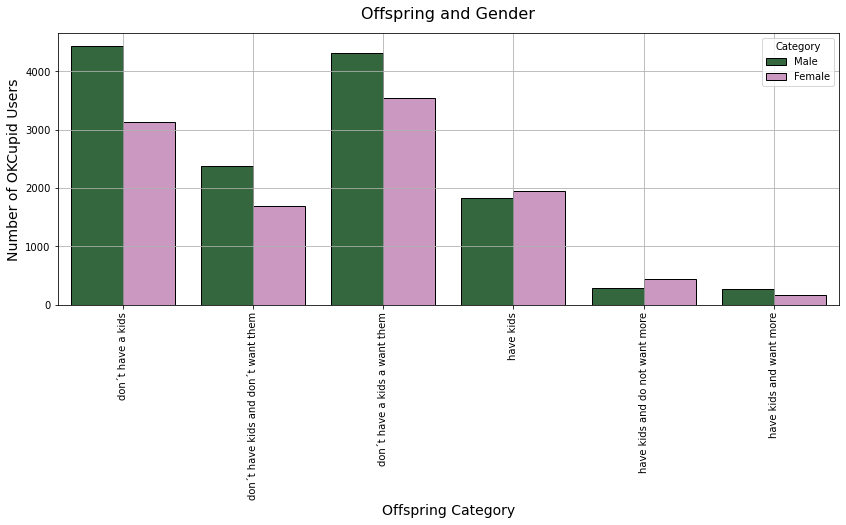

In [59]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
(ax1) = axes

    
title = 'Offspring and Gender'

xlabel = 'Offspring Category'
ylabel = 'Number of OKCupid Users'
x_ticks_labels = ['don´t have a kids', 'don´t have kids and don´t want them', 'don´t have a kids a want them',
                    'have kids', 'have kids and do not want more', 'have kids and want more']


df_a = df.query("sex_code == 0").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Male")
df_b = df.query("sex_code == 1").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Female")
df_plot = pd.concat([df_a, df_b], axis = 0)
sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax1, edgecolor = 'black', palette="cubehelix");
ax1.set_title(title, fontsize=16, y= 1.03)
ax1.set_xlabel(xlabel, fontsize=14)
ax1.set_ylabel(ylabel, fontsize=14)
ax1.set_xticklabels(labels = x_ticks_labels, rotation = 90)
ax1.grid()

Majority of OKCupid users do not have any child, regardless of sex. 

Amount of male and female population that have selected option "have kids" is almost equal. Category "have kids and want them/do not want them" contains very low number of responses.  


# Offspring, Sexual orientation and Religion

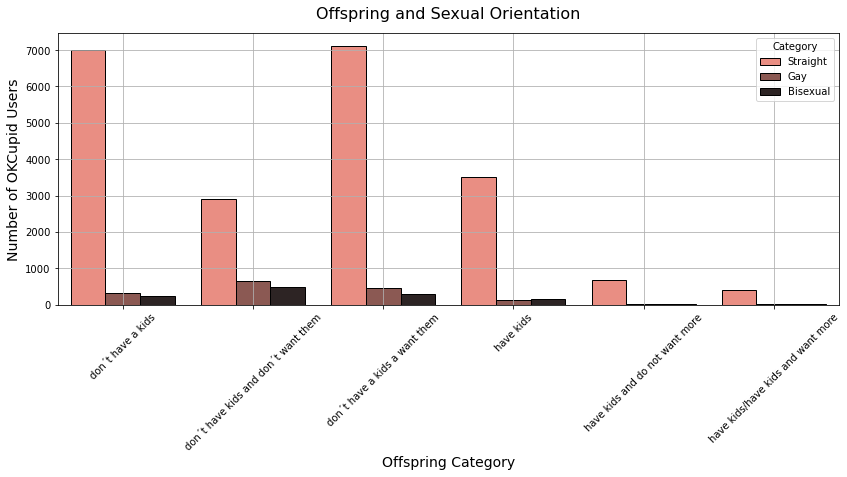

In [57]:
fig, axes = plt.subplots(1,1, figsize=(14,5))
(ax1) = axes

    
title = 'Offspring and Sexual Orientation'

xlabel = 'Offspring Category'
ylabel = 'Number of OKCupid Users'
x_ticks_labels = ['don´t have a kids', 'don´t have kids and don´t want them', 'don´t have a kids a want them',
                    'have kids', 'have kids and do not want more', 'have kids/have kids and want more']


df_a = df.query("orientation_code == 0").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Straight")
df_b = df.query("orientation_code == 1").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Gay")
df_c = df.query("orientation_code == 2").assign(count = 1).groupby("offspring_code").count()[["count"]].assign(Category = "Bisexual")
df_plot = pd.concat([df_a, df_b, df_c], axis = 0)
sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax1, edgecolor = 'black', palette="dark:salmon_r");
ax1.set_title(title, fontsize=16, y= 1.03)
ax1.set_xlabel(xlabel, fontsize=14)
ax1.set_ylabel(ylabel, fontsize=14)
ax1.set_xticklabels(labels = x_ticks_labels, rotation = 45)
ax1.grid()

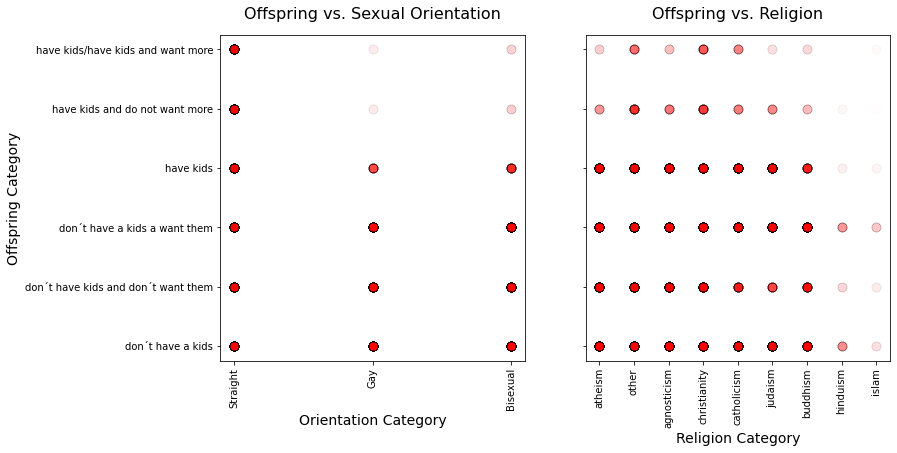

In [60]:
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=True)
(ax1, ax2) = axes
(df[["orientation_code", "offspring_code"]].dropna()
 .plot.scatter('orientation_code', 'offspring_code', ax = ax1, marker = 'o', s=80, color = 'red', edgecolor = 'black', alpha= 0.009)
);
x_ticks_orientation = [0, 1, 2]
y_ticks_offspring = [0, 1, 2, 3, 4, 5]

offspring_labels = ['don´t have a kids', 'don´t have kids and don´t want them', 'don´t have a kids a want them',
                    'have kids', 'have kids and do not want more', 'have kids/have kids and want more']

orientation_labels = ["Straight", "Gay", "Bisexual"]

ax1.set_xticks(x_ticks_orientation)
ax1.set_xticklabels(labels = orientation_labels, rotation = 90)
ax1.set_yticks(y_ticks_offspring)
ax1.set_yticklabels(labels = offspring_labels)
ax1.set_title('Offspring vs. Sexual Orientation', fontsize=16, y= 1.03)
ax1.set_xlabel('Orientation Category', fontsize=14)
ax1.set_ylabel('Offspring Category', fontsize=14);


(df[["religion_clear_code", "offspring_code"]].dropna()
 .plot.scatter('religion_clear_code', 'offspring_code', ax = ax2, marker = 'o', s=80, color = 'red', edgecolor = 'black', alpha= 0.009)
);
x_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]
religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
ax2.set_xticks(x_ticks_religion)
ax2.set_xticklabels(labels = religion_labels, rotation = 90)
ax2.set_yticks(y_ticks_offspring)
ax2.set_yticklabels(labels = offspring_labels)
ax2.set_title('Offspring vs. Religion', fontsize=16, y= 1.03)
ax2.set_xlabel('Religion Category', fontsize=14)
ax2.set_ylabel('Offspring Category', fontsize=14);

2D Scatter plot does not clearly confirms presumption that the gay and bisexual people don´t have childern. There are still some users that have kids and have gay or bisexual orientation.

Offspring category "have kids and want more" or "have kids and do not want more" is less common for religion types other than christianity and catholicism.

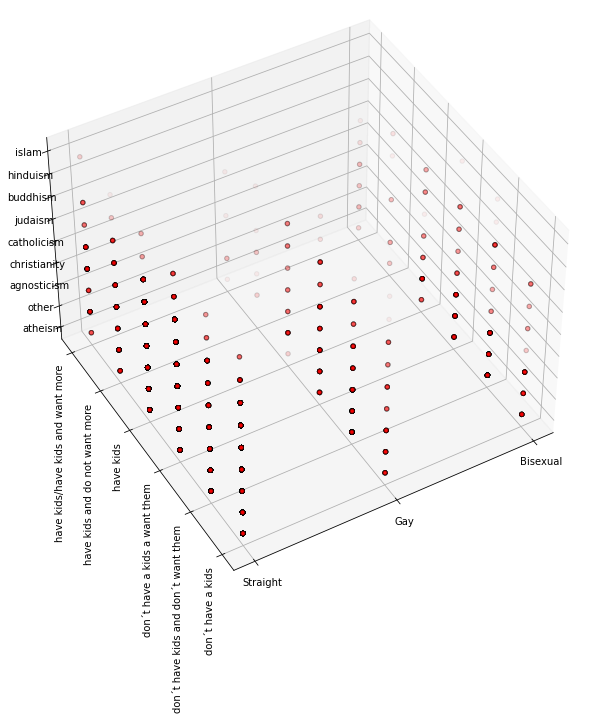

In [61]:
fig = plt.figure(1, figsize=(10,8))
plt.clf()
elev = 43.5
azim = -120
plot_3D_df = df[["orientation_code", "offspring_code", "religion_clear_code"]].dropna()
ax = Axes3D(fig, elev= elev, azim=azim)
ax.scatter(df[["orientation_code"]], df[["offspring_code"]], df[["religion_clear_code"]], color = 'red', edgecolor = 'black', alpha = 0.05);

x_ticks_orientation = [0, 1, 2]
y_ticks_offspring = [0, 1, 2, 3, 4, 5]
z_ticks_religion = [0, 1, 2, 3, 4, 5, 6, 7, 8]
offspring_labels = ['don´t have a kids', 'don´t have kids and don´t want them', 'don´t have a kids a want them',
                    'have kids', 'have kids and do not want more', 'have kids/have kids and want more']
orientation_labels = ["Straight", "Gay", "Bisexual"]
religion_labels = ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']

ax.set_xticks(x_ticks_orientation);
ax.set_xticklabels(labels = orientation_labels, rotation = 0);
ax.set_yticks(y_ticks_offspring);
ax.set_yticklabels(labels = offspring_labels, rotation=90);
ax.set_zticks(z_ticks_religion);
ax.set_zticklabels(labels = religion_labels, rotation=0);

3D scatter plot indicates very low amount of bisexual people with kids that profess catholicism religion. 

Bisexual people are mostly linked to atheism, other or agnosticism religion.

Gay people in the most cases don´t have kids, but want them or they already have kids. 

Gay people with kids mostly profess "other" religion.

# K-Nearest Neighbors algoritm 

## Normalization
Data has to be normalized in order to make every datapoint have the same scale so each feature is equally important. 
1. min-max normaliztion is the most common way to normalize data -> data are transformed into a decimal between 0 and 1.
    This method does not handle outliers, but all features will have the exact same scale. 


2. Z-Score normalization is a strategy of normalizing data that avoids outlier issue, but does not produced normalized data with the exact same scale. 

## Strategies to analyze predictive power of classification algorithm

A. Accuracy - measures how many classifications the algorithm got correct out of every classification it made.
Accuracy = True Positives + True Negatives /  True Positives + True Negatives +  False Positives + False Negatives

B. Recall - measures the percentage of relevant items the algorithm was able to successfully find. 

Recall = True Positive / True Positive + False Negative


C. Precision - measures the percentage of items the algorithm found that were actually relevant. 

Precision = True Positive / True Positive + False Positive


D. F1 Score - combination of accuracy, recall and precision. 

F1 Score = 2 * Precision * Recall / (Precision + Recall)



# Can we predict zodiac sign ?

features for K-Neighbors Classifier are:

    "drugs_code", 
    "drinks_code", 
    "smokes_code", 
    "essay_length_clean", 
    "avg_word_len"
    
labels: zodiac sign

In [62]:
cols_for_KN = ["drugs_code", "drinks_code", "smokes_code", "sign_clear", "essay_length_clean", "I_me_Freq", "essay_length_wo_spaces", "num_words"]
df_KN = df.dropna(subset = cols_for_KN)[cols_for_KN]
df_KN = df_KN.drop(df_KN.query("num_words == 0").index, axis = 0)
df_KN["avg_word_len"] = round(df_KN["essay_length_wo_spaces"] / df_KN["num_words"], 1)

In [63]:
features = df_KN[["drugs_code", "drinks_code", "smokes_code", "essay_length_clean", "avg_word_len"]]
X = features.values
labels = df_KN[["sign_clear"]].values.reshape(-1,)

Feature data are scaled from 0 to 1. Feature data are:

    drugs code, 
    drinks code, 
    smokes code, 
    length of all essays, 
    average word length in the essay
    
Data are randomly splitted on the 80% train set and 20% test set. 

K-Neighbors Classifier has been validated by looping over "k" in range from 0 to 100. 

Validation accuracy for each number of neighbors (k) is plotted below. 

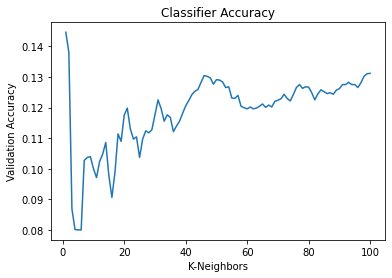

In [64]:
training_data, validation_data, training_labels, validation_labels = train_test_split(X, labels, test_size = 0.2, random_state = 6)
scaler = MinMaxScaler()
training_data_scaled = scaler.fit_transform(training_data)
validation_data_scaled = scaler.fit_transform(validation_data)

neighbors_dict = {}
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data_scaled, training_labels)
    r = classifier.score(validation_data_scaled, validation_labels)
    neighbors_dict[k] = r

x = list(neighbors_dict.keys())
y = list(neighbors_dict.values())

plt.plot(x,y)
plt.xlabel("K-Neighbors")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show();

Classification accuracy is very poor. Prediction of zodiac sign won´t be further studied.  

# K-Nearest Neighbor Classifier and Regressor

K-Nearest Neighbor algorithm can be used for regression and classification. 
When k is small, overfitting occurs and the accuracy is relatively low. 
On the other hand, when k gets too large, underfitting occurs and accuracy starts to


Classifier returns label as a single guess, regressor is returning a number. 

By using weighted average, data points that are extremely similar to the input point will have more of a say in the final results of regression. 


# Can we predict income with age, education, job, sex and city?

In [65]:
cols_for_KNR = ['income_code', 'income', 'age', 'education_code', 'job_code', 
                'sex_code', 'Num_Langs_Fluently', 'Num_Langs_Okay', 
                'num_words', 'essay_length_clean', 'essay_length_wo_spaces',
                'City_code', 'drugs_code', 'drinks_code', 'smokes_code',
                'orientation_code', 'ethnicity_code'
                ]

df_KNR = df.query("State_code == 0").dropna(subset = cols_for_KNR)[cols_for_KNR]
df_KNR = df_KNR.drop(df_KNR.query("income < 0").index, axis = 0)
df_KNR = df_KNR.drop(df_KNR.query("num_words == 0").index, axis = 0)
df_KNR["avg_word_len"] = round(df_KNR["essay_length_wo_spaces"] / df_KNR["num_words"], 1)

There are many data point with income value equal to -1. Those OKCupid users were probably motivated to share the height of their income. Those entries have been dropped before the training process started. 

3 income categories have been established:

       category 1 : income 0 - 50 000 USD
       category 2 : income  50 000 - 100 000 USD
       category 3 : income higher than 100 000 USD
   

Number of data points in every income category is as follows:

In [66]:
df_KNR["income_code"].value_counts()

1    4253
2    2843
3     850
Name: income_code, dtype: int64

Features to predict income category are:

    age
    education code
    job code
    sex code
    City code

In [69]:
features_KNR = df_KNR[['age', 'education_code', 'job_code', 'sex_code', 'City_code']]

Feature data are splitted on train data and test data. Train features and test features are later scaled to get values 0-1.

In [70]:
X_KNR = features_KNR.values
Y_KNR = df_KNR[["income_code"]].values.reshape(-1,)

In [71]:
train_data, test_data, train_labels, test_labels = train_test_split(X_KNR, Y_KNR, test_size = 0.2, random_state = 6)

In [72]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

N-Neighbors = 1, Score: 0.5880503144654088
N-Neighbors = 2, Score: 0.660377358490566
N-Neighbors = 3, Score: 0.6509433962264151
N-Neighbors = 4, Score: 0.6792452830188679
N-Neighbors = 5, Score: 0.6723270440251572
N-Neighbors = 6, Score: 0.6880503144654088
N-Neighbors = 7, Score: 0.6779874213836478
N-Neighbors = 8, Score: 0.6867924528301886
N-Neighbors = 9, Score: 0.6830188679245283
N-Neighbors = 10, Score: 0.6830188679245283
N-Neighbors = 11, Score: 0.6855345911949685
N-Neighbors = 12, Score: 0.6880503144654088
N-Neighbors = 13, Score: 0.6874213836477987
N-Neighbors = 14, Score: 0.6842767295597484
N-Neighbors = 15, Score: 0.6911949685534591
N-Neighbors = 16, Score: 0.690566037735849
N-Neighbors = 17, Score: 0.6842767295597484
N-Neighbors = 18, Score: 0.6849056603773584
N-Neighbors = 19, Score: 0.690566037735849
N-Neighbors = 20, Score: 0.6867924528301886
N-Neighbors = 21, Score: 0.6924528301886792
N-Neighbors = 22, Score: 0.6937106918238993
N-Neighbors = 23, Score: 0.6949685534591195


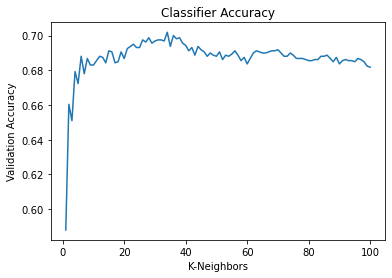

In [73]:
neighbors_dict_KNR = {}
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data_scaled, train_labels)
    r = classifier.score(test_data_scaled, test_labels)
    neighbors_dict_KNR[k] = r
    print('N-Neighbors = {}, Score: {}'.format(k, r))
    
x = list(neighbors_dict_KNR.keys())
y = list(neighbors_dict_KNR.values())

plt.plot(x,y)
plt.xlabel("K-Neighbors")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show();

K-Nearest Neighbor is able to classify the income category with 70 % accuracy, for N_Neighbors = 34.

It can be used as K-Neighbor Regressor in the next step to predict the income value. 

In [74]:
# Features for K-Neighbors Regressor
norm_features = scaler.fit_transform(features_KNR.values)

In [75]:
# Labels for K-Neighbors Regressor
labels_KNR = df_KNR[["income"]].values.reshape(-1,)

In [76]:
regressor = KNeighborsRegressor(n_neighbors = 35, weights = "distance")
regressor.fit(norm_features, labels_KNR)

KNeighborsRegressor(n_neighbors=35, weights='distance')

## Prediction

Age = 46

education = PhD

job = Computer / software

Sex = Man

City = San Francisco

In [77]:
guess_1 = [0.549, 1.0, 0.2, 0.0, 0.0]

Age = 27

education = Elementary

job = student

Sex = Women

City = Berkeley

In [78]:
guess_2 = [0.17647058823529413, 0.0, 0.1, 1.0, 0.4]

Age = 35

education = Post secondary

job = law services - 15

Sex = Man

City = Other in California

In [79]:
guess_3 = [0.333, 0.666, 0.75, 0.0, 1.0]

In [80]:
regressor.predict([guess_1, guess_2, guess_3])

array([208086.07253563, 113331.80354362, 122397.60523662])

In [82]:
def normalize_input(df, input_list):
    norm_list = []
    for i in range(len(input_list)):
        item = df.columns[i]
        minimum = df[[item]].min()
        maximum = df[[item]].max()
        norm_value = float((input_list[i] - minimum) / (maximum - minimum))
        norm_list.append(norm_value)
    return norm_list   
age = int(input("Enter Age (18-69):"))

education_id = int(input("""Enter Education ID: 
                        elementary: 1 
                        secondary: 2 
                        post-secondary: 3 
                        PhD: 4
                        """))

job_id = int(input("""Enter Job ID:    
                        transportation : 0 
                        hospitality / travel : 1 
                        student : 2
                        artistic / musical / writer : 3 
                        computer / hardware / software : 4 
                        banking / financial / real estate : 5 
                        entertainment / media : 6
                        sales / marketing / biz dev : 7 
                        medicine / health : 8 
                        science / tech / engineering : 9 
                        executive / management : 10  
                        education / academia : 11 
                        clerical / administrative : 12 
                        construction / craftsmanship : 13  
                        political / government : 14 
                        law / legal services : 15  
                        military  : 16 
                        unemployed : 17
                        retired : 18
                        rather not say : 19
                        other :20...
                        """))

sex = int(input("""Enter Sex: 
                         Male : 0
                        Female : 1  
                        """))

city = int(input("""Enter City ID: 
                        san francisco : 0
                        oakland : 1
                        berkeley : 2
                        san mateo : 3
                        palo alto : 4
                        other : 5
                        """))
inp_list = [age, education_id,  job_id, sex, city]

norm_list = normalize_input(features_KNR, inp_list)

print('Predicted income {} :'.format(round(regressor.predict([norm_list])[0],2)))

Enter Age (18-69):23
Enter Education ID: 
                        elementary: 1 
                        secondary: 2 
                        post-secondary: 3 
                        PhD: 4
                        3
Enter Job ID:    
                        transportation : 0 
                        hospitality / travel : 1 
                        student : 2
                        artistic / musical / writer : 3 
                        computer / hardware / software : 4 
                        banking / financial / real estate : 5 
                        entertainment / media : 6
                        sales / marketing / biz dev : 7 
                        medicine / health : 8 
                        science / tech / engineering : 9 
                        executive / management : 10  
                        education / academia : 11 
                        clerical / administrative : 12 
                        construction / craftsmanship : 13  
                    

# Can we predict vegetarianism with body type, smokes, drugs and relationship to pets?

## Random Decision Forest

For prediction of vegetarianism a random decision forest classifier has been chosen. 

Random forests are used to avoid overfitting. By aggregating the classification of multiple trees, having overfitted trees in a random forest is less impactful. 

Every decision tree in a random forest is created by using a different subset of data points from the training set. Those data points are chosen at random with replacement, which means a single data point can be chosen more than once. This process is known as bagging. 

In [508]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,orientation_code,education_code,ethnicity_code,job_code,sex_code,State_code,City_code,body_type_code,pets_code,religion_clear_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,0,2.0,2.0,0.0,0,0,0,0.0,0.0,2.0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,0,1.0,0.0,1.0,0,0,1,6.0,0.0,2.0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,0,3.0,NaN,NaN,0,0,0,1.0,2.0,NaN
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,0,2.0,0.0,2.0,0,0,2,1.0,2.0,NaN
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,0,3.0,3.0,3.0,0,0,0,4.0,0.0,NaN


All data point that have vegetarianism or vegan diet are labeled as Vegetarians and have assigned value 1 in "veg_status" column. All other users have value 0 assigned in "veg_status" column.

Following graphs are showing number of vegetarians and non-vegetarians in relationship to different parameters like e.g. drugs, smokes, attitude to pets, sexual orientation, body type and religion. 

In [96]:
RFC_df = df[["diet_code", "smokes_code", "drugs_code", "body_type_code", "pets_code", "orientation_code",
            "religion_clear_code", "education_code", "sex_code", "job_code", "City_code", "ethnicity_code"]].dropna()
veg_codes = [6, 7, 8, 9 ,10, 11]
RFC_df["veg_status"] = RFC_df.apply(lambda row: 1 if row["diet_code"] in veg_codes else 0, axis = 1)

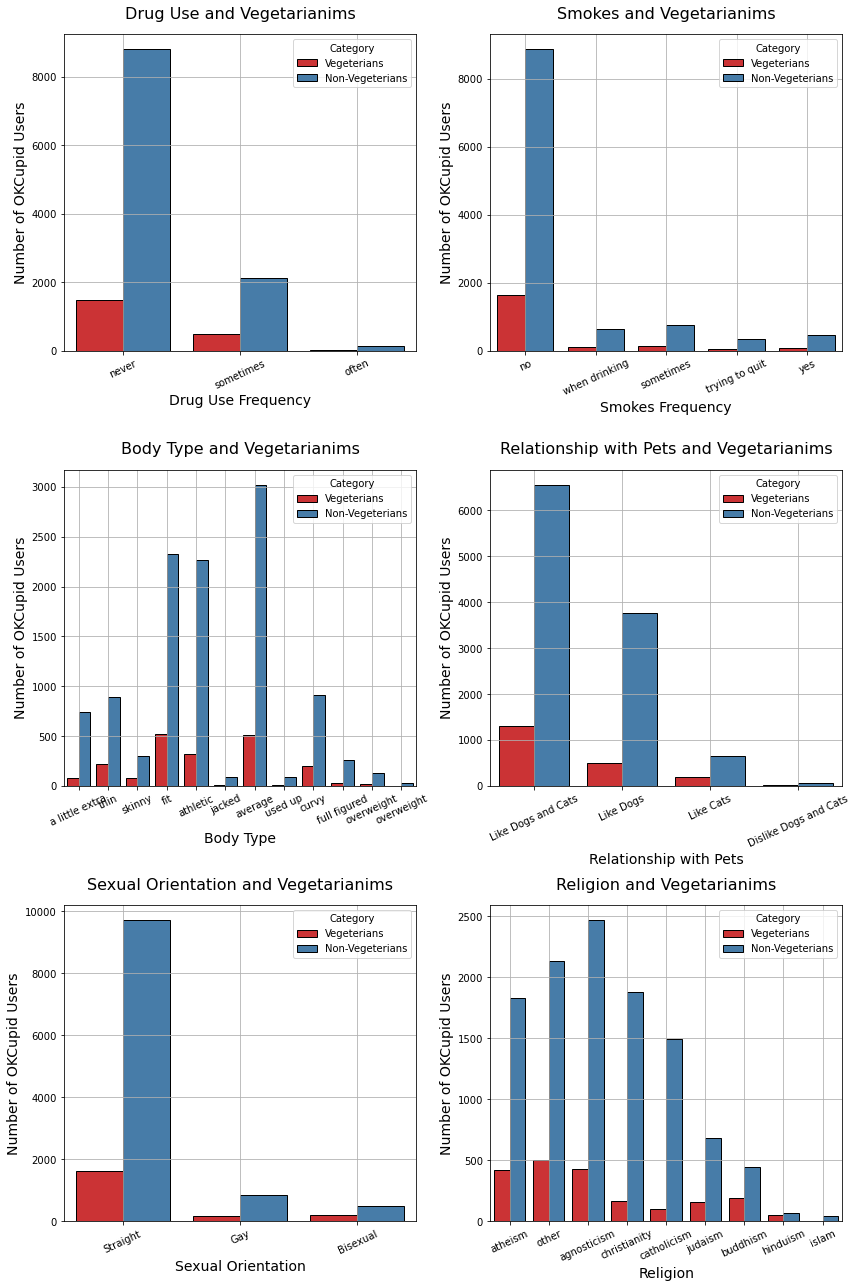

In [97]:
fig, axes = plt.subplots(3,2, figsize=(12,18))
([ax1, ax2], [ax3, ax4], [ax5, ax6]) = axes
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
    
titles = ['Drug Use and Vegetarianims', 
          'Smokes and Vegetarianims', 
          'Body Type and Vegetarianims', 
          'Relationship with Pets and Vegetarianims', 
          'Sexual Orientation and Vegetarianims',
          'Religion and Vegetarianims']

xlabels = ['Drug Use Frequency', 'Smokes Frequency', 'Body Type', 'Relationship with Pets', 'Sexual Orientation', 'Religion']
ylabels = 'Number of OKCupid Users'
x_ticks_labels = [["never", "sometimes", "often"], 
                  ['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'],
                  ['a little extra', 'thin', 'skinny', 'fit', 'athletic', 'jacked', 'average', 'used up', 'curvy', 'full figured','overweight', 'overweight'],
                  ['Like Dogs and Cats', 'Like Dogs', 'Like Cats', 'Dislike Dogs and Cats'],
                  ['Straight', 'Gay', 'Bisexual'],
                  ['atheism', 'other', 'agnosticism', 'christianity', 'catholicism', 'judaism', 'buddhism', 'hinduism', 'islam']
                 ]

columns = ["drugs_code", "smokes_code", "body_type_code", "pets_code", "orientation_code", "religion_clear_code"]

for i, ax in enumerate(axs):
    df_a = RFC_df.query("veg_status == 1").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Vegeterians")
    df_b = RFC_df.query("veg_status == 0").assign(count = 1).groupby(columns[i]).count()[["count"]].assign(Category = "Non-Vegeterians")
    df_plot = pd.concat([df_a, df_b], axis = 0)
    sns.barplot(x = df_plot.index, y = 'count', hue = 'Category', data = df_plot, ax=ax, edgecolor = 'black', palette="Set1");
    ax.set_title(titles[i], fontsize=16, y= 1.03)
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_ylabel(ylabels, fontsize=14)
    ax.set_xticklabels(labels = x_ticks_labels[i], rotation = 25)
    ax.grid()
    plt.tight_layout();


Vegarian / Vegan people in the data set usually do not smoke and never use drugs.
They have also positive attitude to pets, they usually like both dogs and cats. 

They have mostly straight sexual orientation, average or fit body type. 

They also usually profess 3 the most popular religion types in the data set. 


### Imbalance Data Handling

Data set is obviously imbalanced. Imbalanced data is a common problem in data science. Having an imbalanced dataset decreases the sensitivity of the model towards minority classes. Classifier usually predicts mostly the same value which is resulting in very high accuracy of classification. The traditional approach of classification and model accuracy calculation is therefore not useful in the case of the imbalanced dataset.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall is the measure of the classifier’s ability to identify a class. For an imbalanced class dataset F1 score is a more appropriate metric. 

There are many techniques how to deal with imbalanced data:

a. Resample

This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

b. Equal random sampling

### Data Resampling

Data set has been resampled and minority part has been upscaled to match majority class.

In [98]:
#create two different dataframe of majority and minority class 
df_majority = RFC_df[(RFC_df['veg_status']==0)] 
df_minority = RFC_df[(RFC_df['veg_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 11049, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Number of values after upsampling are as follows:

In [99]:
df_upsampled.veg_status.value_counts()

0    11049
1    11049
Name: veg_status, dtype: int64

Features used to train a classifier are:
   
    smokes_code, 
    drugs code
    body type code
    orientation code
    religion code
    sex code
    city code
    ethnicity code
    

In [100]:
X_RFC = df_upsampled[["smokes_code", 
                      "drugs_code", 
                      "body_type_code", 
                      "orientation_code", 
                      "religion_clear_code", 
                      "sex_code", 
                      "City_code", 
                      "ethnicity_code"
                     ]]
Y_RFC = df_upsampled[["veg_status"]].values.reshape(-1,)

Random train test split has been performed. 20% of data is used for testing phase of ML algorithm. As features the smokes, drugs, body type, orientation, religion, sex, city and ethinicity code were used. 

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_RFC, Y_RFC, test_size = 0.2, random_state = 1)

Random Forest Classifier with 100 decision trees has been defined. 

In [102]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_predicted = forest.predict(X_test)

Decission Tree Forest classifier has been trained and following score parameters have been achieved:

In [104]:
print('Recall score: {}'.format(round(recall_score(Y_test, y_predicted), 4)))
print('Accuracy score: {}'.format(round(accuracy_score(Y_test, y_predicted), 4)))
print('Precision score: {}'.format(round(precision_score(Y_test, y_predicted), 4)))
print('F1 score: {}'.format(round(f1_score(Y_test, y_predicted), 4)))

Recall score: 0.838
Accuracy score: 0.786
Precision score: 0.7655
F1 score: 0.8001


In [105]:
ConfusionMatrix = confusion_matrix(Y_test, y_predicted)

Number of true negatives, true positives, false negatives and false positives are as follows:

In [106]:
print('True Negative: {}'.format(ConfusionMatrix[0][0]))
print('True Positive: {}'.format(ConfusionMatrix[1][1]))
print('False Negative: {}'.format(ConfusionMatrix[1][0]))
print('False Positive: {}'.format(ConfusionMatrix[0][1]))

True Negative: 1581
True Positive: 1893
False Negative: 366
False Positive: 580


In [107]:
score_test = forest.score(X_test, Y_test)
print('Test score: {}'.format(score_test))

Test score: 0.785972850678733


In [108]:
score_train = forest.score(X_train, Y_train)
print('Train score: {}'.format(score_train))

Train score: 0.8252064713202851


The reported train and test score is very high, but can we really on this? Is really the algorithm performance so good and can we really rely on it?

The aswer is NO . The problem that occured is called data leakage. Upscaling applied on the data set before splitting to train set and test set leads to repeating the labels and the algorithm has a perfect Recall Score of 84 %. It is too optimistic results and is supposed to be totally wrong. Due to data leakage from train set to test set we have exactly same data in the train set and test set.

It is always needed to apply resampling only on the train set data to avoid duplicities in the train and test set. 

### Resampling applied on the training set exclusively

In [109]:
RFC_df = df[["diet_code", "smokes_code", "drugs_code", "body_type_code", "pets_code", "orientation_code",
            "religion_clear_code", "education_code", "sex_code", "job_code", "City_code", "ethnicity_code"]].dropna()
veg_codes = [6, 7, 8, 9 ,10, 11]
RFC_df["veg_status"] = RFC_df.apply(lambda row: 1 if row["diet_code"] in veg_codes else 0, axis = 1)

In [110]:
X_RFC = RFC_df[["smokes_code", 
                "drugs_code", 
                "body_type_code", 
                "orientation_code"
                #"religion_clear_code" 
                #"sex_code", 
                #"City_code", 
                #"ethnicity_code"
               ]]
Y_RFC = RFC_df[["veg_status"]]

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_RFC, Y_RFC, test_size = 0.2, random_state = 1)

In [112]:
train_set = X_train.join(Y_train)

Number of items for both classes in the train set is as follows:

In [113]:
train_set.veg_status.value_counts()

0    8824
1    1625
Name: veg_status, dtype: int64

In [114]:
df_majority = train_set[(train_set['veg_status']==0)] 
df_minority = train_set[(train_set['veg_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8824, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

After resampling the number of items for both classes is equal. Sklearn resample module randomly replicate the samples from the minority class. 

In [115]:
df_upsampled.veg_status.value_counts()

0    8824
1    8824
Name: veg_status, dtype: int64

In [116]:
X_train_resampled = df_upsampled[["smokes_code", 
                      "drugs_code", 
                      "body_type_code", 
                      "orientation_code"
                      #"religion_clear_code"  
                      #"sex_code", 
                      #"City_code", 
                      #"ethnicity_code"
                     ]]
Y_train_resampled = df_upsampled[["veg_status"]].values.reshape(-1,)

In [117]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(random_state=42)

In [118]:
y_predicted = forest.predict(X_test)

In [119]:
print('Recall score: {}'.format(round(recall_score(Y_test, y_predicted), 4)))
print('Accuracy score: {}'.format(round(accuracy_score(Y_test, y_predicted), 4)))
print('Precision score: {}'.format(round(precision_score(Y_test, y_predicted), 4)))
print('F1 score: {}'.format(round(f1_score(Y_test, y_predicted), 4)))

Recall score: 0.5387
Accuracy score: 0.5656
Precision score: 0.1794
F1 score: 0.2692


Recall score get worse to 54 % and F1 score is only 27%. Random Forest Classifier score is very poor!
Upsampling of minority class in the train set does not lead to sufficient score value. 


### Equal random sampling

In [156]:
RFC_df = df[["diet_code", "smokes_code", "drinks_code", "drugs_code", "body_type_code", "pets_code", "orientation_code",
            "religion_clear_code", "education_code", "sex_code", "job_code", "City_code", "ethnicity_code"]].dropna()
veg_codes = [6, 7, 8, 9 ,10, 11]
RFC_df["veg_status"] = RFC_df.apply(lambda row: 1 if row["diet_code"] in veg_codes else 0, axis = 1)

In [157]:
print('Minimum number of items from for Veterianism classes is: {}'.format(RFC_df[["veg_status"]].value_counts().min()))

Minimum number of items from for Veterianism classes is: 2004


In [158]:
minimum_num_items = RFC_df[["veg_status"]].value_counts().min()
RFC_df_veg = RFC_df[RFC_df['veg_status']==1].sample(minimum_num_items)
RFC_df_non_veg = RFC_df[RFC_df['veg_status']==0].sample(minimum_num_items)

RFC_df_resampled = pd.concat([RFC_df_veg, RFC_df_non_veg])

In [159]:
RFC_df_resampled.veg_status.value_counts()

0    2004
1    2004
Name: veg_status, dtype: int64

Features used to train a random decission forrest classifier are:
   
    smokes code
    drugs code
    body type code
    religion code
    sex code
    pets code
    

In [192]:
X_RFC = RFC_df_resampled[["smokes_code", 
                #"drinks_code",
                "drugs_code", 
                "body_type_code", 
                #"orientation_code", 
                "religion_clear_code", 
                "sex_code",
                "pets_code",
                #"City_code", 
                #"ethnicity_code"
                     ]]
Y_RFC = RFC_df_resampled[["veg_status"]].values.reshape(-1,)

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X_RFC, Y_RFC, test_size = 0.2, random_state = 42)

In [194]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest.fit(X_train, Y_train)
y_predicted = forest.predict(X_test)

In [195]:
print('Recall score: {}'.format(round(recall_score(Y_test, y_predicted), 4)))
print('Accuracy score: {}'.format(round(accuracy_score(Y_test, y_predicted), 4)))
print('Precision score: {}'.format(round(precision_score(Y_test, y_predicted), 4)))
print('F1 score: {}'.format(round(f1_score(Y_test, y_predicted), 4)))

Recall score: 0.6316
Accuracy score: 0.616
Precision score: 0.6316
F1 score: 0.6316


F1 score achieves value of 63%. Classifier score got better in comparison to upsampling approach of minority class. 

In [182]:
ConfusionMatrix = confusion_matrix(Y_test, y_predicted)
print('True Negative: {}'.format(ConfusionMatrix[0][0]))
print('True Positive: {}'.format(ConfusionMatrix[1][1]))
print('False Negative: {}'.format(ConfusionMatrix[1][0]))
print('False Positive: {}'.format(ConfusionMatrix[0][1]))

True Negative: 230
True Positive: 264
False Negative: 154
False Positive: 154


Confusion matrix can be visualised like a heat map:

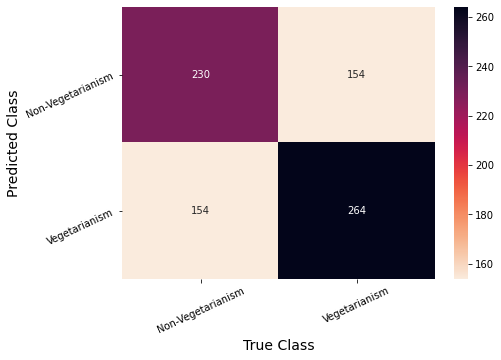

In [183]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.heatmap(ConfusionMatrix, ax = ax, annot = True, cmap=sns.cm.rocket_r, fmt = 'g');
x_ticks_labels = ['Non-Vegetarianism', 'Vegetarianism']
y_ticks_labels = ['Non-Vegetarianism', 'Vegetarianism']
ax.set_xticklabels(labels = x_ticks_labels, rotation = 25);
ax.set_yticklabels(labels = y_ticks_labels, rotation = 25);
ax.set_xlabel('True Class', fontsize=14);
ax.set_ylabel('Predicted Class', fontsize=14);

# Can we predict sexual orientation with offspring, religion, drugs, smokes, sex and number of fluently speaking languages?

To predict the sexual orientation of the OKCupid users the ML algorithm called Support Vector Machine has been implemented. 

Data are scaled from 0 to 1 before splitting data set to train set and test set. 

In [196]:
scaler = MinMaxScaler()
classifier = SVC(kernel = 'rbf')

In [197]:
df_SVC = df[["orientation_code", "offspring_code", "religion_clear_code", "drugs_code", "age", "sex_code", "Num_Langs_Fluently", "body_type_code"]].dropna()

As seen on the bar charts above the sexual orientation classes  unequally occur in the data set. Therefore the minimum number of  items for each class is used as parameter for the random sample selection from dataset. 

In [198]:
print('Minimum number of items from all 3 sexual orientation classes is: {}'.format(df_SVC[["orientation_code"]].value_counts().min()))

Minimum number of items from all 3 sexual orientation classes is: 710


In [199]:
minimum_num_items = df_SVC[["orientation_code"]].value_counts().min()
df_SVC_straight = df_SVC[df_SVC['orientation_code']==0].sample(minimum_num_items)
df_SVC_gay = df_SVC[df_SVC['orientation_code']==1].sample(minimum_num_items)
df_SVC_bisexual = df_SVC[df_SVC['orientation_code']==2].sample(minimum_num_items)

df_SVC_resampled = pd.concat([df_SVC_straight, df_SVC_gay, df_SVC_bisexual])

In [200]:
print('For each sexual sexual orientation class {} random samples have been selected.'.format(minimum_num_items))

For each sexual sexual orientation class 710 random samples have been selected.


Number of samples for each class is equal. 

In [201]:
df_SVC_resampled.orientation_code.value_counts()

0    710
2    710
1    710
Name: orientation_code, dtype: int64

In [202]:
X = df_SVC_resampled[["offspring_code", "religion_clear_code", "drugs_code", "age", "sex_code", "Num_Langs_Fluently"]]
y = df_SVC_resampled[["orientation_code"]].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Scaling transformation avoids the problem of having only some features influence the algorithm´s optimization process and hleps make the computations exact, smooth and fast. 

In [203]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Cross validation is started to check the algorithm score. The "cv" parameter specifies the cross-validation strategy. In this case the integer number of folds was set to 10. List of cross-validation accuracies for each fold is returned. 

In [204]:
cv_acc = cross_val_score(classifier, X_train_scaled, y_train, cv=10)
print('Cross validation accuracies for K-folds: {} '.format(cv_acc))

Cross validation accuracies for K-folds: [0.55555556 0.64327485 0.64327485 0.56725146 0.50588235 0.54117647
 0.53529412 0.53529412 0.58235294 0.47058824] 


In [205]:
print('Mean Cross-validation accuracy: {}'.format(round(np.mean(cv_acc),3)))

Mean Cross-validation accuracy: 0.558


In [206]:
print('Test score: {}'.format(round((classifier.fit(X_train_scaled, y_train)).score(X_test_scaled, y_test), 3)))

Test score: 0.531


In [209]:
y_predicted_SVM = classifier.predict(X_test_scaled)

Text(42.0, 0.5, 'Predicted Class')

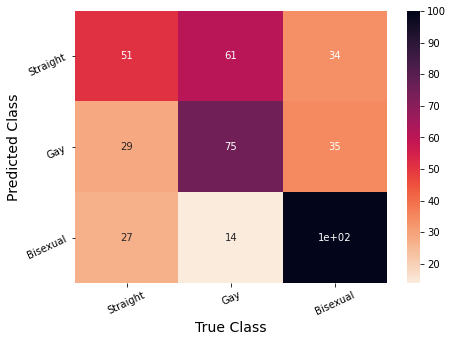

In [210]:
ConfusionMatrix_SVC = confusion_matrix(y_test, y_predicted_SVM)
fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.heatmap(ConfusionMatrix_SVC, ax = ax, annot = True, cmap=sns.cm.rocket_r)
x_ticks_labels = ['Straight', 'Gay', 'Bisexual']
y_ticks_labels = ['Straight', 'Gay', 'Bisexual']
ax.set_xticklabels(labels = x_ticks_labels, rotation = 25)
ax.set_yticklabels(labels = y_ticks_labels, rotation = 25)
ax.set_xlabel('True Class', fontsize=14)
ax.set_ylabel('Predicted Class', fontsize=14)

Grid Search CV is an exhaustive search over specified parameter values. It implements "fit" and "score" method. 
Cross-validation splitting strategy can be applied by specifying cv parameter. It specified number of folds in K-Fold Cross Validation. 

SVM use different types of kernel method to seperate the data points. 

    1.linear - decision boundary is linear
    2. polynomial - used for data that are non-linerly separable. 
    3. radial basis funcion - gamma and c parameters can be tuned to get model more or less sensitive to training data
        A higher gamma, say 100, will put more importance on the training data and could result in overfitting. 
        Conversely, A lower gamma like 0.01 makes the points in the training data less relevant and can result 
        in underfitting.


Classifier is tuned for following gamma and c paremters:

In [211]:
search_space = [{'kernel' : ['rbf'],
                 'C' : np.logspace(-3, 3, 7),
                 'gamma' : np.logspace(-3,2,6)}]

gridsearch = GridSearchCV(classifier, param_grid = search_space, refit=True, cv=10, n_jobs = -1)
gridsearch.fit(X_train_scaled, y_train)
print('C-parameter range: {}'.format(np.logspace(-3, 3, 7)))
print('Gamma-parameter range: {}'.format(np.logspace(-3, 2, 6)))
print('-'*30)
print(f'Best parameter:{gridsearch.best_params_}')
print(f'Best score {round(gridsearch.best_score_, 3)}')

C-parameter range: [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
Gamma-parameter range: [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
------------------------------
Best parameter:{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
Best score 0.561
